<a href="https://colab.research.google.com/github/Tommy-D0/The-Real-estate-in-Perth/blob/main/Final_project_House_price_in_Perth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final project: Analysis House price in Perth

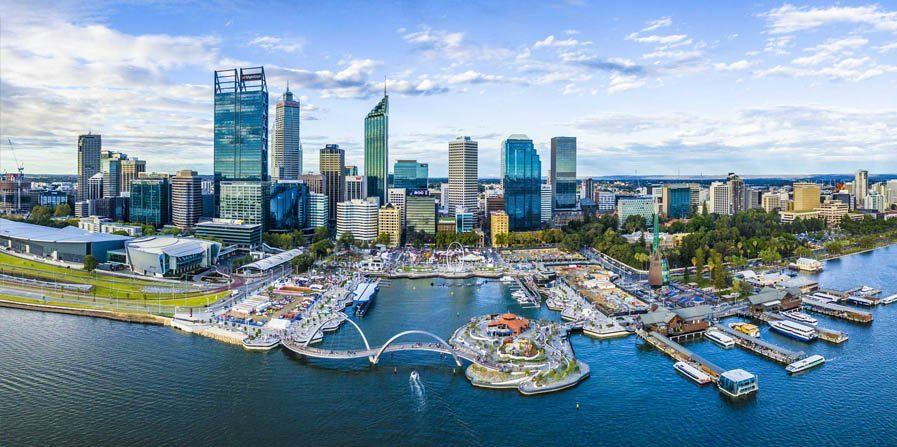

# Introduction

Hello world! Welcome to my chanel, I would like to introduce my Project series 😀 This project is build some models that can predict Perth (located in Western Australia) housing prices based on features made available in the Perth Housing Dataset! Now, let's start this journey!


## Overview data sources and variable defination

Let's review some of the features that are available in the Perth Housing Dataset:
- **Suburb**: Specific locality in Perth; a list of all Perth suburb can be found [here](https://www.homely.com.au/find-suburb-by-region/perth-greater-western-australia)
- **Price**: Price at which a property was sold (AUD)

- **Bedrooms**: Number of bedrooms

- **Bathrooms**: Number of bathrooms

- **Garage**: Number of garage places

- **Land area**: Total land area (m^2)

- **Floor area**: Internal floor area (m^2)

- **Dist CBD**: : Distance from the center business district of Perth (km)

- **Station**: The nearest public transport station from the property

- **Dist ST**: The nearest station distance (km)

- **School**:Location of the nearest School

- **Dist SC**: Distance to the nearest school (km)

- **Postcode**: Local Area Identifier [here](https://www.investing.com/indices/s-p-asx200-a-reit)

- **Longitide**: Geographic Location (long) of ADDRESS

- **Latitude**: Geographic Location (lat) of ADDRESS

- **Month**: Month in which the property was sold

- **Year**: Year in which the property was sold

- **Rate**: The currency exchange rate is a rate at which one currency will be exchanged for another currency and affects trade and the movement of money between countries. (USD => AUD)

- **GDP PC**: The income per person over years ($) of  a country is an economic metric that was calculated based on
a country's economic output to a per person allocation.

- **REIT Index**: Real Estate Investment Trust Index is a composite of REITs that are publicly traded on a stock exchange. It provides a snapshot of the performance of the real estate sector in the stock market.

**The specific dataset resources:**

1. [Perth House Prices](https://www.kaggle.com/datasets/syuzai/perth-house-prices/data) - Original datasets
2. [REIT index](https://www.investing.com/indices/s-p-asx200-a-reit) - Dateset addition
3. [Currency Exchange Rate](https://www.investing.com/currencies/usd-aud-historical-data) - Dateset addition
4. [GDP per capita](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD) - Dateset addition

**Project Appendix:** [Link](https://docs.google.com/document/d/1rnApY_FoEmh1mzYGOiRkB85JfOHkid5W8sGJ3a6rHQQ/edit)



## Big question

1.   Why are house prices in Perth so expensive?
2.   How to choose the perfect location to buy a home in Perth?
3.   Determine the value of the house you will buy?

We role are real estate consulting services to offer solutions that suit customer needs (not a broker) --
Working process:
1. Explain to them the housing price situation in Perth that is it expensive or cheap?
2. We would consider seriously geographical locations to align with the needs of customers. (Suburb suggestion)
3. Afterward, clients will seek for appropriate locations in the market that we have suggested to previous places.
4. Finally, we re-evaluate the house's real value so that the customer can discuss the affordable price with the host holder. (house value validation)


# I. Preparation & Cleaning Data

#### 1/ Import relevant libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import files

warnings.filterwarnings("ignore")

In [ ]:
# Import Perth houseing datasets:

link = 'https://raw.githubusercontent.com/Tommy-D0/Real-estate-Project-/main/Perth_HousePrices.csv'
df = pd.read_csv(link)
df.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN


In [ ]:
# Import Currency Exchange Rate index datasets:

link = 'https://raw.githubusercontent.com/Tommy-D0/The-Real-estate-in-Perth/main/USD_AUD%20Historical%20Data.csv'
Rate = pd.read_csv(link)
Rate.head()

,Date,Price
0,3/18/2019,1.4071
1,3/15/2019,1.4100
2,3/14/2019,1.4154
3,3/13/2019,1.4094
4,3/12/2019,1.4120


In [ ]:
# Import REIT index datasets:
link = 'https://github.com/Tommy-D0/Real-estate-Project-/raw/main/S&P_ASX%20200%20REIT%20Historical%20Data%20(1).csv'
REIT = pd.read_csv(link)
REIT.head()

,Date,Price
0,1/12/2020,"1,442.70"
1,1/11/2020,"1,455.70"
2,1/10/2020,"1,285.40"
3,1/9/2020,"1,290.20"
4,1/8/2020,"1,310.80"


In [ ]:
# Import GDP percapita datasets:
link = 'https://github.com/Tommy-D0/Real-estate-Project-/raw/main/GDP%20Per%20capita%20Worlwide.xls'
GDP = pd.read_excel(link)
GDP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1965,1966,1967,1968,1969,1970,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26514.868980,26940.264114,28419.264534,28449.712946,29329.081747,30918.483584,31902.809818,24008.127822,29127.759384,33300.838819
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,177.769086,186.630486,199.559835,210.078097,229.711026,243.158263,...,1736.849038,1725.332959,1554.167299,1444.003514,1625.286236,1558.307482,1507.982881,1355.805923,1545.613215,1644.062829
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,105.243196,143.103233,167.165675,134.012768,134.250360,162.642175,...,638.733185,626.512930,566.881133,523.053012,526.140801,492.090632,497.741429,512.055098,355.777826,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,137.301801,143.012562,127.325268,128.366811,142.327523,193.576278,...,2154.150832,2248.316255,1882.264038,1648.762676,1590.277754,1735.374911,1812.446822,1688.075575,1766.943618,1785.312219
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5061.349240,5011.984412,3217.339244,1809.709377,2439.374441,2540.508878,2191.347764,1450.905112,1927.474078,3000.444231


## 2/ Overview of datasets

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

In [ ]:
Rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5000 non-null   object 
 1   Price   5000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 78.2+ KB


In [ ]:
REIT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    252 non-null    object
 1   Price   252 non-null    object
dtypes: object(2)
memory usage: 4.1+ KB


In [ ]:
GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1965            140 non-null    float64
 5   1966            143 non-null    float64
 6   1967            146 non-null    float64
 7   1968            151 non-null    float64
 8   1969            151 non-null    float64
 9   1970            160 non-null    float64
 10  1971            163 non-null    float64
 11  1972            163 non-null    float64
 12  1973            163 non-null    float64
 13  1974            164 non-null    float64
 14  1975            166 non-null    float64
 15  1976            167 non-null    float64
 16  1977            170 non-null    float64
 17  1978            169 non-null    flo

## 3/ Remove unwanted data

### ☢ REIT (Real estate index trust) & Rate (Currency Exchange Rate)

In [ ]:
REIT.head()

,Date,Price
0,1/12/2020,"1,442.70"
1,1/11/2020,"1,455.70"
2,1/10/2020,"1,285.40"
3,1/9/2020,"1,290.20"
4,1/8/2020,"1,310.80"


In [ ]:
# Tranform datetime
REIT["Date"] = pd.to_datetime(REIT["Date"], dayfirst= True)

Rate["Date"] = pd.to_datetime(Rate["Date"], dayfirst= True)

# Extract timeline
REIT["Year"] = REIT["Date"].dt.year
REIT["Month"] = REIT["Date"].dt.month

Rate["Year"] = Rate["Date"].dt.year

In [ ]:
# Rename column
REIT.rename(columns= {"Price": "REIT Index"}, inplace = True)

Rate.rename(columns= {"Price": "CX Rate"}, inplace = True)

In [ ]:
# Extract data points
REIT["REIT Index"] = REIT["REIT Index"].str.replace(",", "")

# Tranform datatype
REIT["REIT Index"]  = REIT["REIT Index"].astype("float64")
Rate["CX Rate"]  = Rate["CX Rate"].astype("float64")

In [ ]:
# Drop unnecessary columns
REIT.drop(columns="Date", inplace = True)
Rate.drop(columns="Date", inplace = True)

In [ ]:
REIT.head()

,REIT Index,Year,Month
0,1442.7,2020,12
1,1455.7,2020,11
2,1285.4,2020,10
3,1290.2,2020,9
4,1310.8,2020,8


In [ ]:
Rate = Rate.groupby("Year").mean(numeric_only= True)["CX Rate"].reset_index()
Rate.head()

# Rate.to_csv("CX_Rate.csv")
# files.download("CX_Rate.csv")

,Year,CX Rate
0,2000,1.727054
1,2001,1.933977
2,2002,1.839787
3,2003,1.538837
4,2004,1.359419


In [ ]:
REIT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   REIT Index  252 non-null    float64
 1   Year        252 non-null    int32  
 2   Month       252 non-null    int32  
dtypes: float64(1), int32(2)
memory usage: 4.1 KB


### 💰 GDP PC datasets

In [ ]:
GDP.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1965,1966,1967,1968,1969,1970,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,26514.868980,26940.264114,28419.264534,28449.712946,29329.081747,30918.483584,31902.809818,24008.127822,29127.759384,33300.838819
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,177.769086,186.630486,199.559835,210.078097,229.711026,243.158263,...,1736.849038,1725.332959,1554.167299,1444.003514,1625.286236,1558.307482,1507.982881,1355.805923,1545.613215,1644.062829
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,105.243196,143.103233,167.165675,134.012768,134.250360,162.642175,...,638.733185,626.512930,566.881133,523.053012,526.140801,492.090632,497.741429,512.055098,355.777826,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,137.301801,143.012562,127.325268,128.366811,142.327523,193.576278,...,2154.150832,2248.316255,1882.264038,1648.762676,1590.277754,1735.374911,1812.446822,1688.075575,1766.943618,1785.312219
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5061.349240,5011.984412,3217.339244,1809.709377,2439.374441,2540.508878,2191.347764,1450.905112,1927.474078,3000.444231


In [ ]:
# Extract Australia
GDP = GDP[GDP["Country Name"] == "Australia"]

In [ ]:
# Convert rows into columns
GDP = GDP.melt(var_name = "Year", value_name = "GDP PC")

In [ ]:
GDP.head()

,Year,GDP PC
0,Country Name,Australia
1,Country Code,AUS
2,Indicator Name,GDP per capita (current US$)
3,Indicator Code,NY.GDP.PCAP.CD
4,1965,2281.011956


In [ ]:
# Drop rows
GDP = GDP[5:]

In [ ]:
Rate.head()

,CX Rate,Year,Month
0,1.4071,2019,3
1,1.4100,2019,3
2,1.4154,2019,3
3,1.4094,2019,3
4,1.4120,2019,3


In [ ]:
# convert data type

GDP["GDP PC"]  = GDP["GDP PC"].astype("float64")
GDP["Year"]  = GDP["Year"].astype("int")

In [ ]:
GDP["GDP PC"] = GDP["GDP PC"].round(2)

In [ ]:
# Extract datasets from 2000 - 2019
GDP = GDP[(GDP["Year"] >= 2000) & (GDP["Year"] < 2020)]

In [ ]:
GDP.head()

,Year,GDP PC
39,2000,21870.42
40,2001,19695.73
41,2002,20301.84
42,2003,23718.13
43,2004,30836.73


### 🏠 Perth Housing datasets

In [ ]:
df.shape

(33656, 19)

In [ ]:
# Extract datetime Month and Year from Date_sold
# Expand = True: this expands the result of the split into two new columns in dataframe

df["Month"] = df["DATE_SOLD"].str.split("-", expand=True)[0].astype("int")
df["Year"] = (df["DATE_SOLD"].str.split("-", expand=True)[1]).str.split("\r", expand = True)[0].astype("int")

In [ ]:
df.head()

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,...,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK,Month,Year
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,...,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN,9,2018
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,...,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0,2,2019
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,...,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0,6,2015
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,...,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN,7,2018
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,...,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN,11,2016


In [ ]:
# Filter data from 2000 - 2020
df = df[(df["Year"] >= 2000) & (df["Year"] < 2020)]

In [ ]:
# Drop unecessary columns
df.drop(["ADDRESS", "NEAREST_SCH_RANK", "DATE_SOLD", "BUILD_YEAR"], inplace= True, axis = 1)

In [ ]:
# Rename columns
df.columns = ["Suburb", "Price", "Bedrooms", "Bathrooms", "Garage", "Land area", "Floor area",
              "Dist CBD","Station", "Dist ST","Postcode", "Latitude","Longitude",
              "School", "Dist SC", "Month", "Year"]

In [ ]:
# Convert m -> km
df["Dist CBD"] =  df["Dist CBD"] / 1000
df["Dist ST"] =  df["Dist ST"] / 1000

In [ ]:
df.head()

,Suburb,Price,Bedrooms,Bathrooms,Garage,Land area,Floor area,Dist CBD,Station,Dist ST,Postcode,Latitude,Longitude,School,Dist SC,Month,Year
0,South Lake,565000,4,2,2.0,600,160,18.3,Cockburn Central Station,1.8,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,9,2018
1,Wandi,365000,3,2,2.0,351,139,26.9,Kwinana Station,4.9,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,2,2019
2,Camillo,287000,3,1,1.0,719,86,22.6,Challis Station,1.9,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,6,2015
3,Bellevue,255000,2,1,2.0,651,59,17.9,Midland Station,3.6,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,7,2018
4,Lockridge,325000,4,1,2.0,466,131,11.2,Bassendean Station,2.0,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,11,2016


In [ ]:
# Merge data of 2 datasets Perth house and CPI
df = pd.merge(df, GDP, on = "Year", how = "left")

In [ ]:
# Merge data of 2 datasets Perth house and REIT
df = pd.merge(df, REIT, on = ["Year", "Month"], how = "left")

In [ ]:
df.head()

,Suburb,Price,Bedrooms,Bathrooms,Garage,Land area,Floor area,Dist CBD,Station,Dist ST,Postcode,Latitude,Longitude,School,Dist SC,Month,Year,GDP PC,REIT Index
0,South Lake,565000,4,2,2.0,600,160,18.3,Cockburn Central Station,1.8,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,9,2018,57273.52,1427.4
1,Wandi,365000,3,2,2.0,351,139,26.9,Kwinana Station,4.9,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,2,2019,55049.57,1477.9
2,Camillo,287000,3,1,1.0,719,86,22.6,Challis Station,1.9,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,6,2015,56758.87,1235.5
3,Bellevue,255000,2,1,2.0,651,59,17.9,Midland Station,3.6,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,7,2018,57273.52,1422.5
4,Lockridge,325000,4,1,2.0,466,131,11.2,Bassendean Station,2.0,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,11,2016,49918.79,1326.4


## 4/ Deal with missing and duplication values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28181 entries, 0 to 28180
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Suburb      28181 non-null  object 
 1   Price       28181 non-null  int64  
 2   Bedrooms    28181 non-null  int64  
 3   Bathrooms   28181 non-null  int64  
 4   Garage      26520 non-null  float64
 5   Land area   28181 non-null  int64  
 6   Floor area  28181 non-null  int64  
 7   Dist CBD    28181 non-null  float64
 8   Station     28181 non-null  object 
 9   Dist ST     28181 non-null  float64
 10  Postcode    28181 non-null  int64  
 11  Latitude    28181 non-null  float64
 12  Longitude   28181 non-null  float64
 13  School      28181 non-null  object 
 14  Dist SC     28181 non-null  float64
 15  Month       28181 non-null  int64  
 16  Year        28181 non-null  int64  
 17  CPI         28181 non-null  float64
 18  GDP PC      28181 non-null  float64
 19  REIT Index  28181 non-nul

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

Suburb           0
Price            0
Bedrooms         0
Bathrooms        0
Garage        1661
Land area        0
Floor area       0
Dist CBD         0
Station          0
Dist ST          0
Postcode         0
Latitude         0
Longitude        0
School           0
Dist SC          0
Month            0
Year             0
CPI              0
GDP PC           0
REIT Index       0
dtype: int64

In [ ]:
# Total the percentages of null values
df.isna().sum() / df.shape[0] *100

Suburb        0.000000
Price         0.000000
Bedrooms      0.000000
Bathrooms     0.000000
Garage        5.894042
Land area     0.000000
Floor area    0.000000
Dist CBD      0.000000
Station       0.000000
Dist ST       0.000000
Postcode      0.000000
Latitude      0.000000
Longitude     0.000000
School        0.000000
Dist SC       0.000000
Month         0.000000
Year          0.000000
CPI           0.000000
GDP PC        0.000000
REIT Index    0.000000
dtype: float64

In [ ]:
# Drop null values due to total null values < 10% datasets --> it's okk
df.dropna(inplace = True)

Using `df.describe()` will give you the statistical information of all continuous variables in the dataset

In [ ]:
df.describe()

,Price,Bedrooms,Bathrooms,Garage,Land area,Floor area,Dist CBD,Dist ST,Postcode,Latitude,Longitude,Dist SC,Month,Year,CPI,GDP PC,REIT Index
count,2.652000e+04,26520.000000,26520.000000,26520.000000,26520.000000,26520.000000,26520.000000,26520.000000,26520.000000,26520.000000,26520.000000,26520.000000,26520.000000,26520.000000,26520.000000,26520.000000,26520.000000
mean,6.497201e+05,3.680392,1.844532,2.227376,2569.895060,183.427979,19.409073,4.470068,6089.514065,-31.961561,115.882501,1.822964,6.689404,2016.251772,1.844869,55585.127321,1356.693560
std,3.588904e+05,0.745716,0.588232,1.427099,14656.105543,72.347415,11.125107,4.501954,62.158044,0.172903,0.118018,1.747202,3.380452,2.780071,0.461710,5762.203200,208.665525
min,5.100000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,0.681000,0.046000,6003.000000,-32.472979,115.582730,0.070912,1.000000,2000.000000,1.280000,19695.730000,663.500000
25%,4.175000e+05,3.000000,2.000000,2.000000,503.000000,130.000000,11.000000,1.800000,6050.000000,-32.064705,115.792538,0.885910,4.000000,2015.000000,1.610000,53954.550000,1302.800000
50%,5.440000e+05,4.000000,2.000000,2.000000,683.000000,172.000000,17.100000,3.200000,6070.000000,-31.935980,115.857130,1.353548,7.000000,2017.000000,1.910000,55049.570000,1375.300000
75%,7.800000e+05,4.000000,2.000000,2.000000,837.000000,222.000000,26.100000,5.200000,6149.000000,-31.850640,115.974265,2.119343,10.000000,2018.000000,1.950000,57273.520000,1453.500000
max,2.440000e+06,10.000000,16.000000,99.000000,999999.000000,870.000000,59.800000,35.500000,6558.000000,-31.457450,116.343201,20.720911,12.000000,2019.000000,4.460000,68198.420000,2523.100000


In [ ]:
df.shape

(26520, 20)

In [ ]:
df.nunique()

Suburb          316
Price          2063
Bedrooms         10
Bathrooms         7
Garage           25
Land area      3766
Floor area      509
Dist CBD        586
Station          68
Dist ST        1142
Postcode        112
Latitude      23778
Longitude     23083
School          159
Dist SC       26270
Month            12
Year             20
CPI              20
GDP PC           20
REIT Index      233
dtype: int64

## 5/ Outlier
That said our data contains quite a lot of outliers, which is to be expected from a non consistent selling standard/rules for properties, allowing certain properties to be prices above/below values of similar properties depending on specific circumstaces.

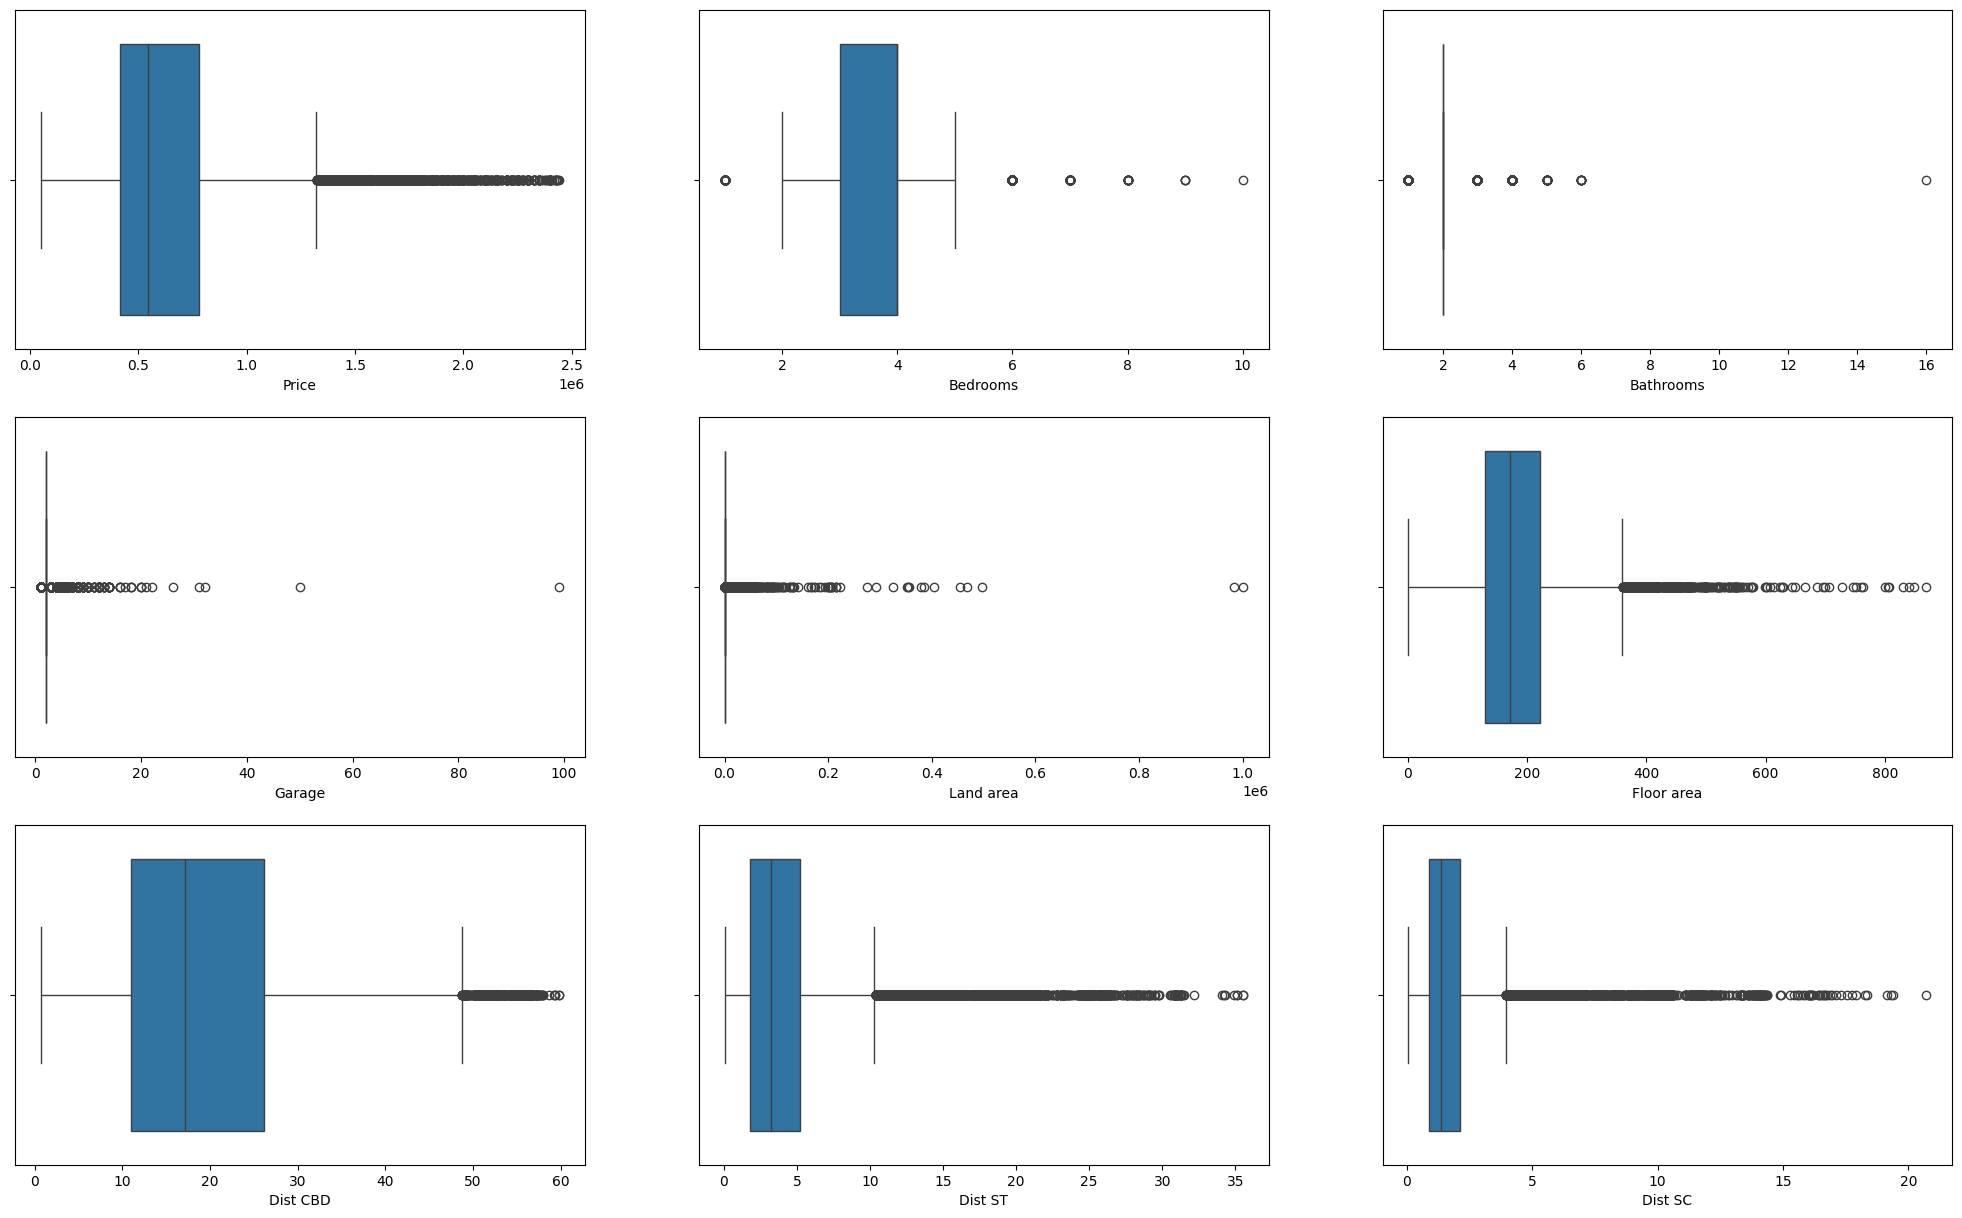

In [ ]:
# Histogram can be a good chart to support the above explanation on Box plot
k = ['Price', 'Bedrooms', 'Bathrooms', 'Garage', 'Land area','Floor area',
     'Dist CBD', 'Dist ST','Dist SC']

plt.figure(figsize= (25,15))
for i in k:
  plt.subplot(331+ k.index(i))
  sns.boxplot(df, x= i)

plt.show()

In [ ]:
df.shape

(26520, 20)

In [ ]:
# Filter outliers
from scipy.stats import zscore
import numpy as np

k = ['Price', 'Bedrooms', 'Bathrooms', 'Garage', 'Land area',
     'Floor area', 'Dist CBD', 'Dist ST','Dist SC']
for i in k:
  z_scores = np.abs(zscore(df[i]))
  df = df[z_scores < 3]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23456 entries, 0 to 28180
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Suburb      23456 non-null  object 
 1   Price       23456 non-null  int64  
 2   Bedrooms    23456 non-null  int64  
 3   Bathrooms   23456 non-null  int64  
 4   Garage      23456 non-null  float64
 5   Land area   23456 non-null  int64  
 6   Floor area  23456 non-null  int64  
 7   Dist CBD    23456 non-null  float64
 8   Station     23456 non-null  object 
 9   Dist ST     23456 non-null  float64
 10  Postcode    23456 non-null  int64  
 11  Latitude    23456 non-null  float64
 12  Longitude   23456 non-null  float64
 13  School      23456 non-null  object 
 14  Dist SC     23456 non-null  float64
 15  Month       23456 non-null  int64  
 16  Year        23456 non-null  int64  
 17  CPI         23456 non-null  float64
 18  GDP PC      23456 non-null  float64
 19  REIT Index  23456 non-null  fl

In [ ]:
df.head()

,Suburb,Price,Bedrooms,Bathrooms,Garage,Land area,Floor area,Dist CBD,Station,Dist ST,Postcode,Latitude,Longitude,School,Dist SC,Month,Year,CPI,GDP PC,REIT Index
0,South Lake,565000,4,2,2.0,600,160,18.3,Cockburn Central Station,1.8,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,9,2018,1.91,57273.52,1427.4
2,Camillo,287000,3,1,1.0,719,86,22.6,Challis Station,1.9,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,6,2015,1.51,56758.87,1235.5
3,Bellevue,255000,2,1,2.0,651,59,17.9,Midland Station,3.6,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,7,2018,1.91,57273.52,1422.5
4,Lockridge,325000,4,1,2.0,466,131,11.2,Bassendean Station,2.0,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,11,2016,1.28,49918.79,1326.4
5,Mount Richon,409000,4,2,1.0,759,118,27.3,Armadale Station,1.0,6112,-32.153801,116.023658,ARMADALE SENIOR HIGH SCHOOL,1.227219,3,2013,2.45,68198.42,1013.4


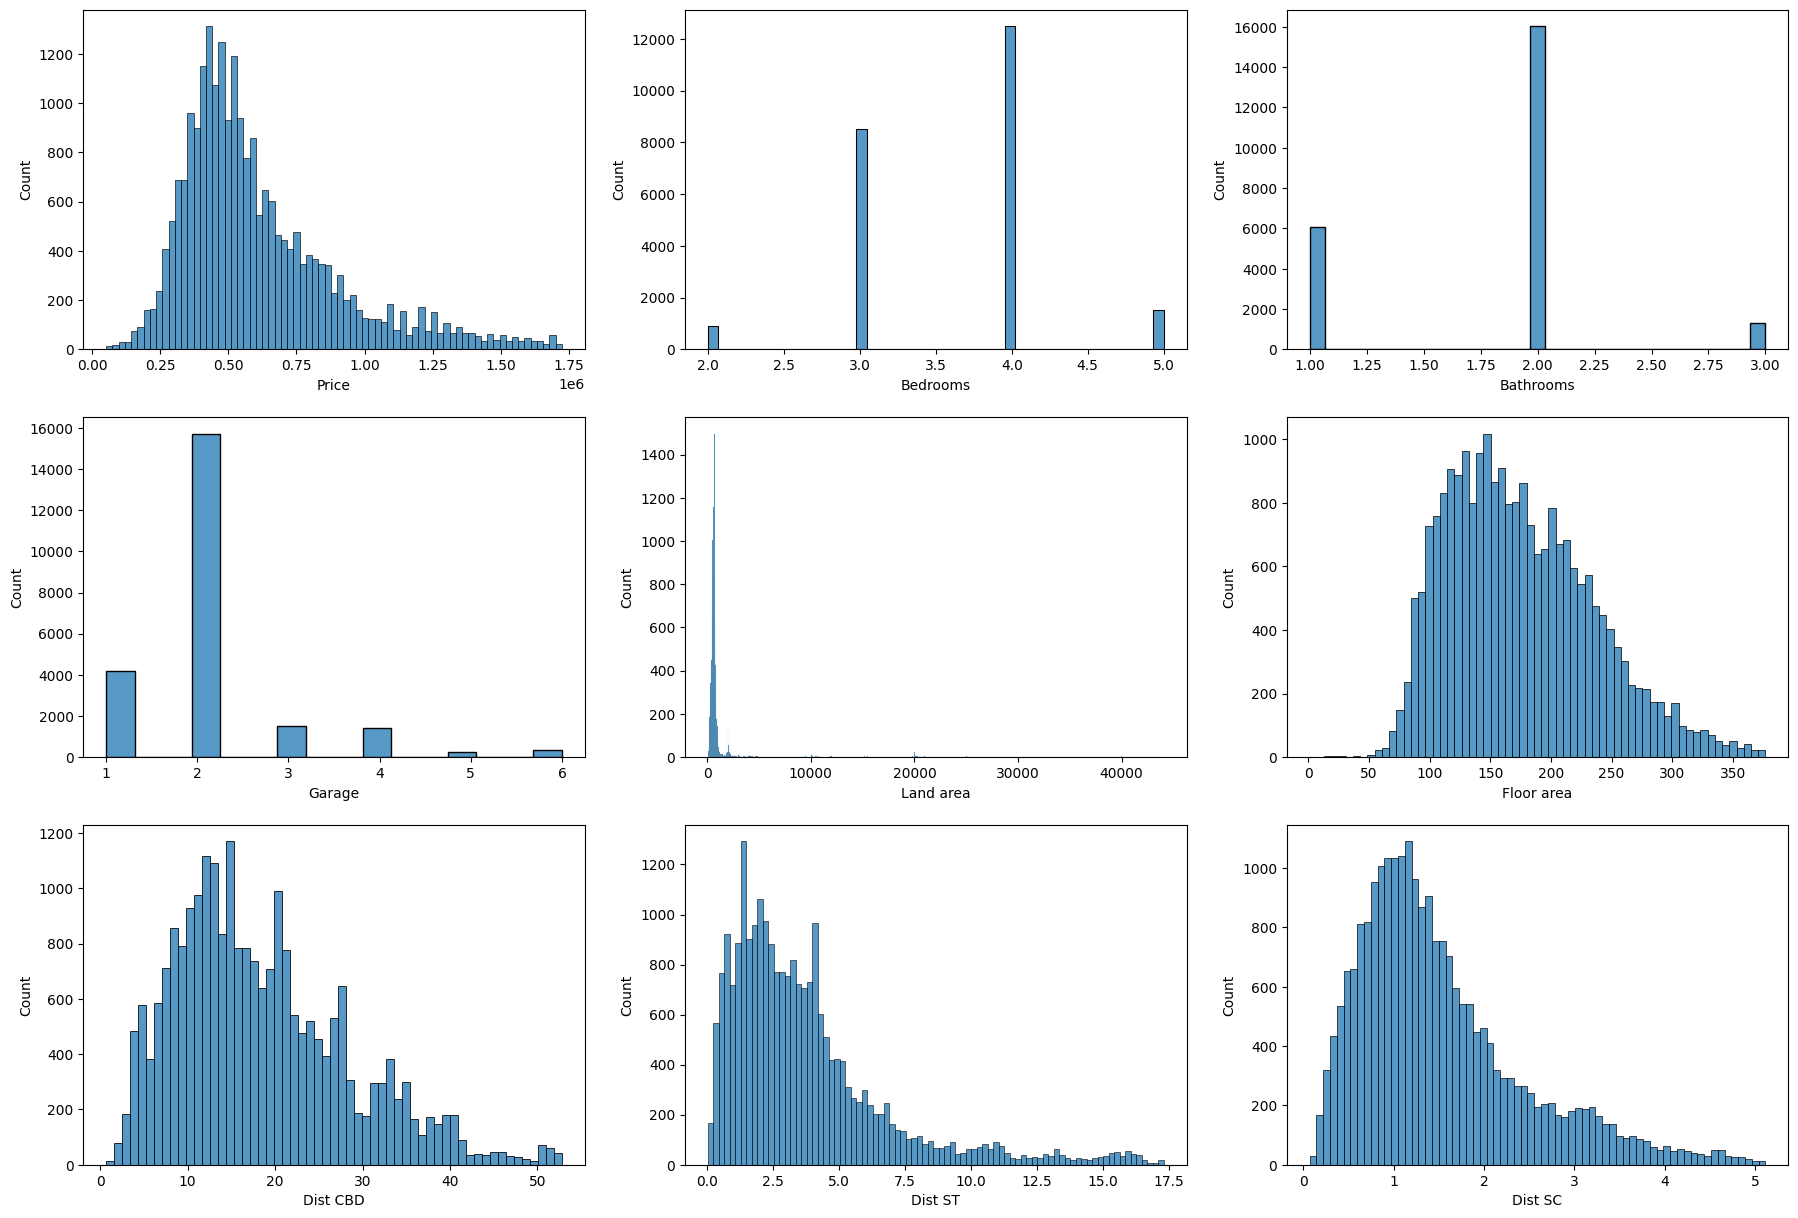

In [ ]:
# Data Distributions Histograms
k = ["Price",'Bedrooms', 'Bathrooms', 'Garage', 'Land area','Floor area',
     'Dist CBD', 'Dist ST','Dist SC']

plt.figure(figsize= (22,15))
for i in k:
  plt.subplot(331 + k.index(i))
  sns.histplot(df, x= i)
plt.show()

In [ ]:
# correlation between features
df.corr(numeric_only=True).style.background_gradient(cmap="Blues")

,Price,Bedrooms,Bathrooms,Garage,Land area,Floor area,Dist CBD,Dist ST,Postcode,Latitude,Longitude,Dist SC,Month,Year,CPI,GDP PC,REIT Index
Price,1.000000,0.249613,0.356355,0.149823,0.114460,0.555458,-0.389959,-0.078183,-0.149012,0.061725,-0.213721,-0.022031,0.008815,0.029772,-0.012518,0.029392,-0.016945
Bedrooms,0.249613,1.000000,0.548291,0.216524,0.063469,0.576461,0.141594,0.114453,0.008982,0.041195,-0.040562,0.089024,-0.000195,0.053890,-0.027008,-0.015528,0.033038
Bathrooms,0.356355,0.548291,1.000000,0.227384,0.027827,0.584030,0.050252,0.065830,-0.031337,0.072157,-0.102874,0.090074,0.003381,0.100684,-0.038167,-0.032404,0.072637
Garage,0.149823,0.216524,0.227384,1.000000,0.065601,0.238752,0.016236,0.088382,0.023300,-0.017066,0.059094,0.061658,0.002111,0.042524,-0.021858,0.007913,0.017467
Land area,0.114460,0.063469,0.027827,0.065601,1.000000,0.114175,0.157536,0.262571,0.036195,-0.069279,0.209911,0.278861,-0.005016,-0.280887,0.184243,-0.059855,-0.087391
Floor area,0.555458,0.576461,0.584030,0.238752,0.114175,1.000000,0.036004,0.130343,-0.042380,0.060316,-0.083631,0.128012,0.003392,0.011081,0.019943,-0.039156,0.037296
Dist CBD,-0.389959,0.141594,0.050252,0.016236,0.157536,0.036004,1.000000,0.273685,0.173865,-0.159362,-0.149045,0.199643,-0.013787,-0.001431,0.028291,0.022353,0.013180
Dist ST,-0.078183,0.114453,0.065830,0.088382,0.262571,0.130343,0.273685,1.000000,-0.010087,0.074246,0.408257,0.385012,0.000758,-0.125389,0.088492,-0.032786,-0.014017
Postcode,-0.149012,0.008982,-0.031337,0.023300,0.036195,-0.042380,0.173865,-0.010087,1.000000,-0.797853,0.052115,-0.029195,-0.004814,-0.030481,-0.000550,0.010003,-0.032880
Latitude,0.061725,0.041195,0.072157,-0.017066,-0.069279,0.060316,-0.159362,0.074246,-0.797853,1.000000,-0.142673,0.030934,0.006964,0.063779,-0.030546,-0.035514,0.060847


# II.  Exploratory data analysis





### 1/ Geographical locations

In [ ]:
from IPython import display
# Geographical locations of Postcode in Perth
display.IFrame(src="https://public.tableau.com/views/FinaProjectPerth-PostcodeDistributions/Sheet1?:language=en-US&:sid=&:display_count=n&:origin=viz_share_link:showVizHome=no&:embed=true",
               width=990, height=599)

In [ ]:
# Geographical location rely heavily on distance from central business district
display.IFrame(src="https://public.tableau.com/views/FinaProjectPerth-Thecentralbusinessdistrict/Sheet1?:language=en-US&:sid=&:display_count=n&:origin=viz_share_link:showVizHome=no&:embed=true",
               width=990, height=599)

In [ ]:
# Geographical location relies heavily on the volume of
display.IFrame(src="https://public.tableau.com/views/FinaProjectPerth-Thevolumetransactions/Sheet1?:language=en-US&:sid=&:display_count=n&:origin=viz_share_link:showVizHome=no&:embed=true",
               width=990, height=599)

### 2/ House prices

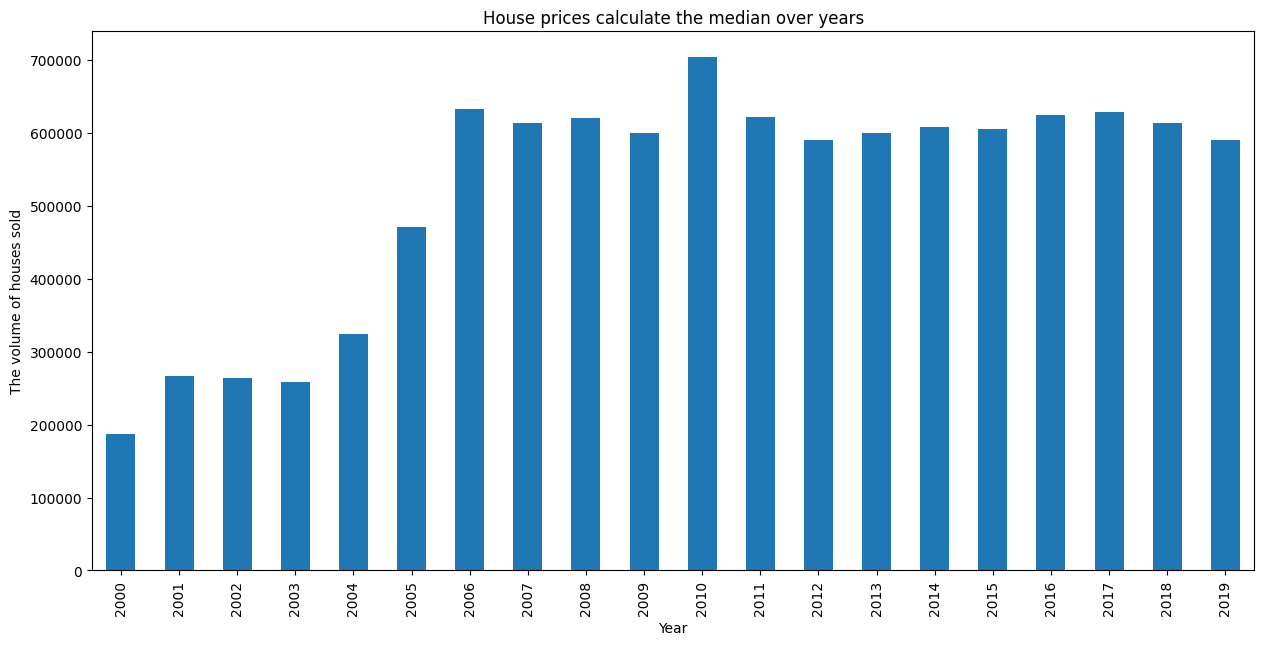

In [ ]:
# House prices calculate the median over years

plt.title("House prices calculate the median over years")
df.groupby("Year").mean(numeric_only=True)["Price"].plot(kind="bar", figsize=(15,7))
plt.ylabel("The volume of houses sold")
plt.show()

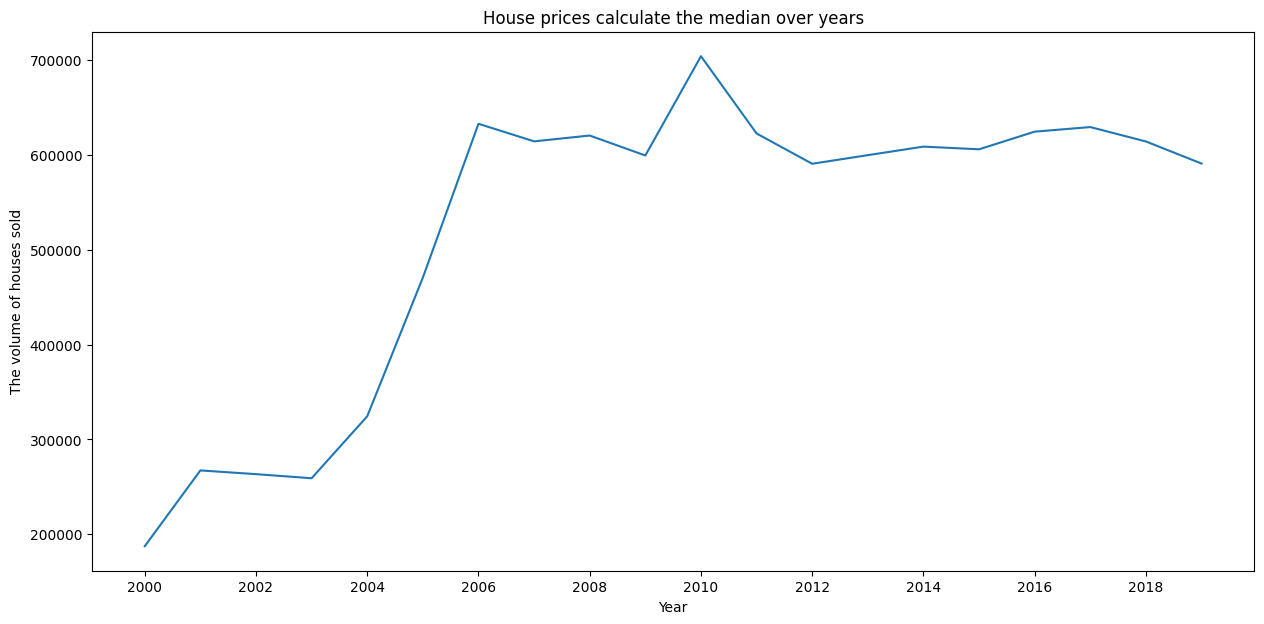

In [ ]:
# House prices calculate the median over years

plt.title("House prices calculate the median over years")
df.groupby("Year").mean(numeric_only=True)["Price"].plot(kind="line", figsize=(15,7))
plt.ylabel("The volume of houses sold")
plt.xticks(ticks= list(range(2000,2020,2)))
plt.show()

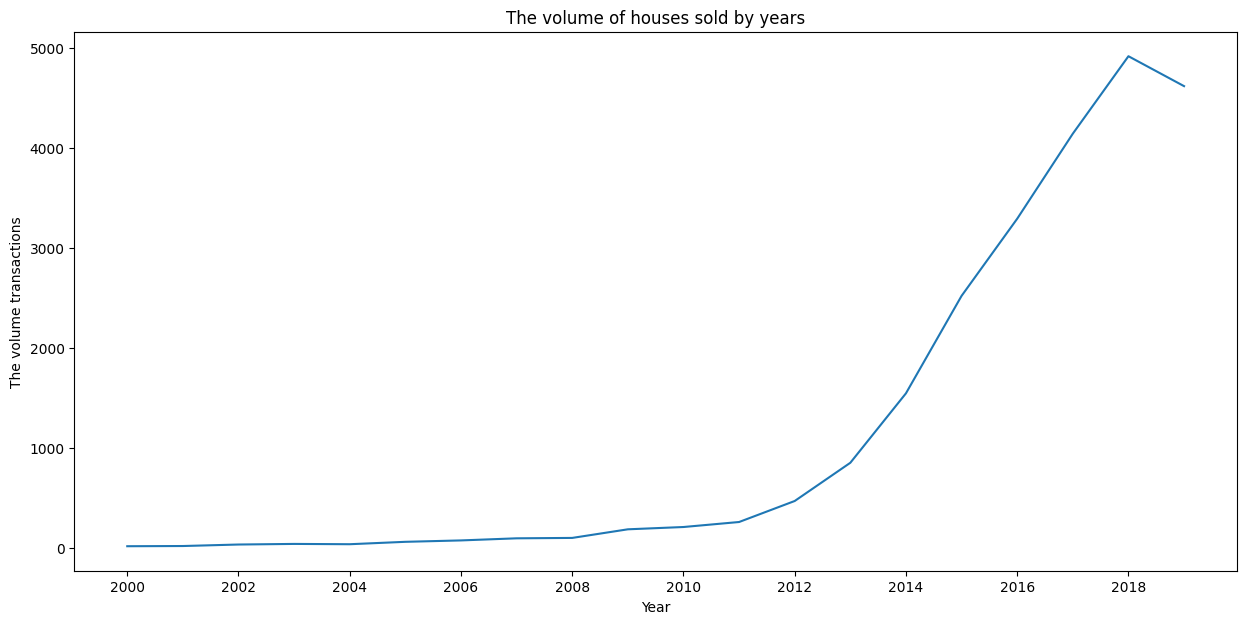

In [ ]:
# The volume of houses sold by years

plt.title("The volume of houses sold by years")
df.groupby("Year").count()["Price"].plot(kind="line", figsize=(15,7))
plt.ylabel("The volume transactions")
plt.xticks(ticks=list(range(2000,2020,2)))
plt.show()

### 3/ Macro factors

**GDP percapita**

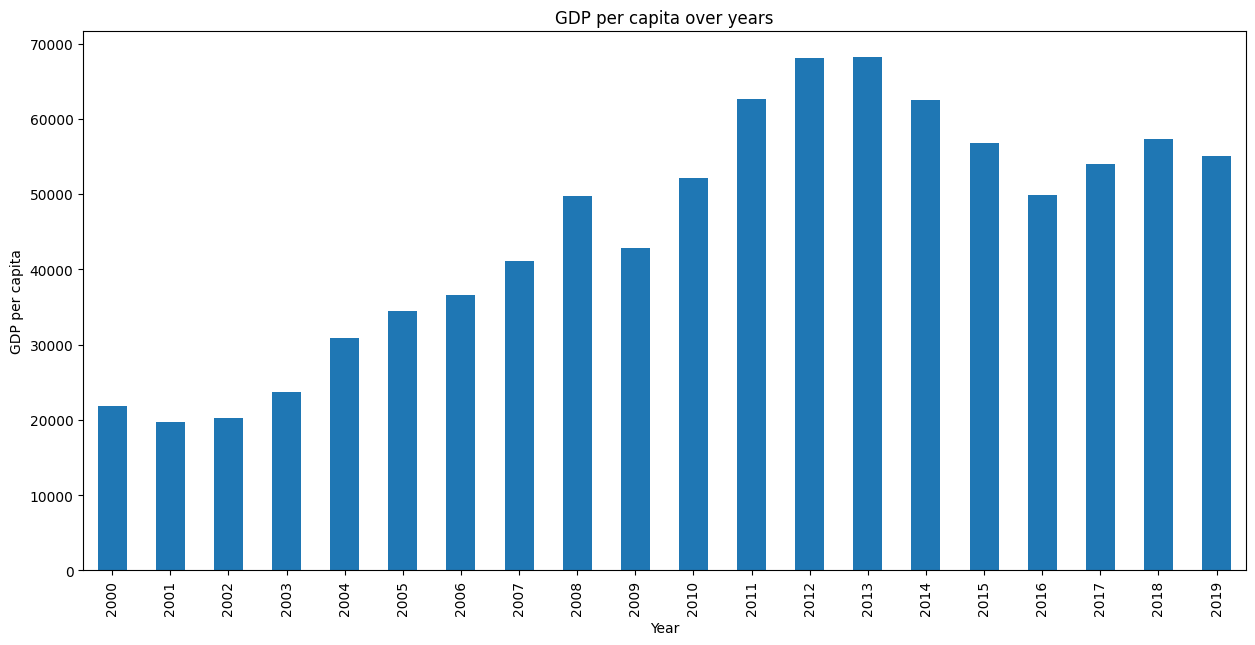

In [ ]:
# GDP calculate the median over years

plt.title("GDP per capita over years")
df.groupby("Year").mean(numeric_only = True)["GDP PC"].plot(kind="bar", figsize= (15,7))
plt.ylabel("GDP per capita")
plt.show()

In [ ]:
# The average house price in 2012
df[df["Year"] == 2012]["Price"].mean()

590504.2243589744

In [ ]:
# Accummualte budget from 2000 to 2012
sum(df.groupby("Year").mean(numeric_only = True)["GDP PC"][0:13])

503902.50999999995

**REIT index - Real Estate Investment Trust Index**

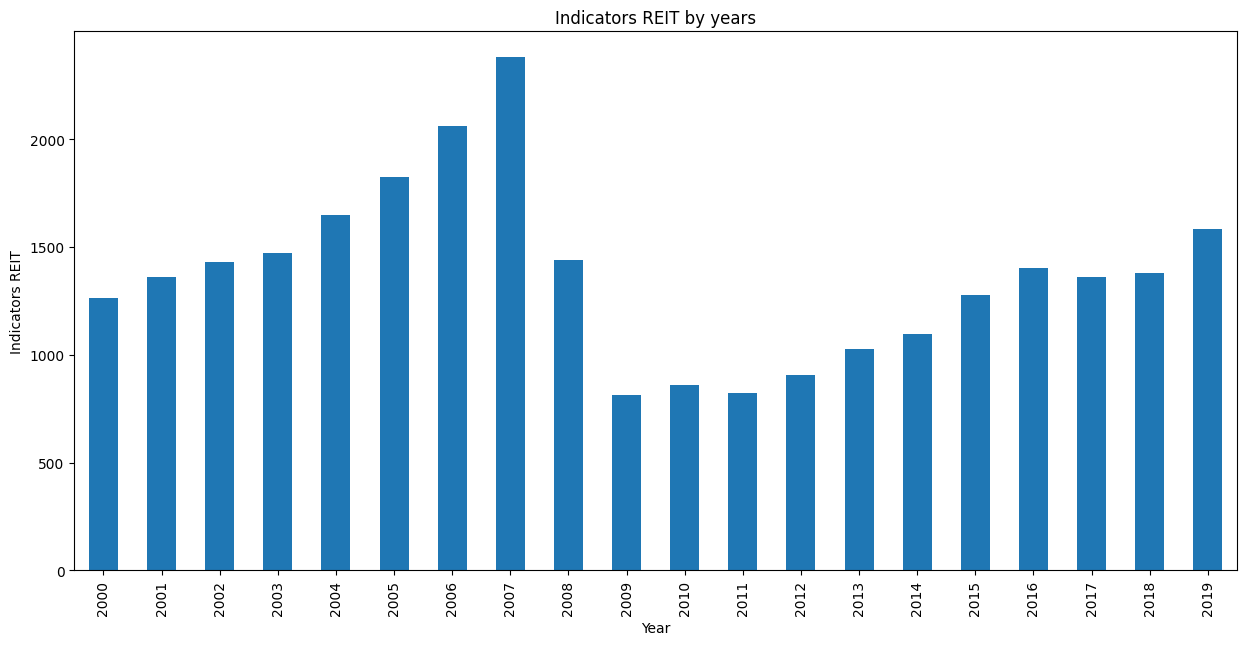

In [ ]:
plt.title("Indicators REIT by years")
df.groupby("Year").mean(numeric_only=True)["REIT Index"].plot(kind="bar", figsize=(15,7))
plt.ylabel("Indicators REIT")
plt.show()

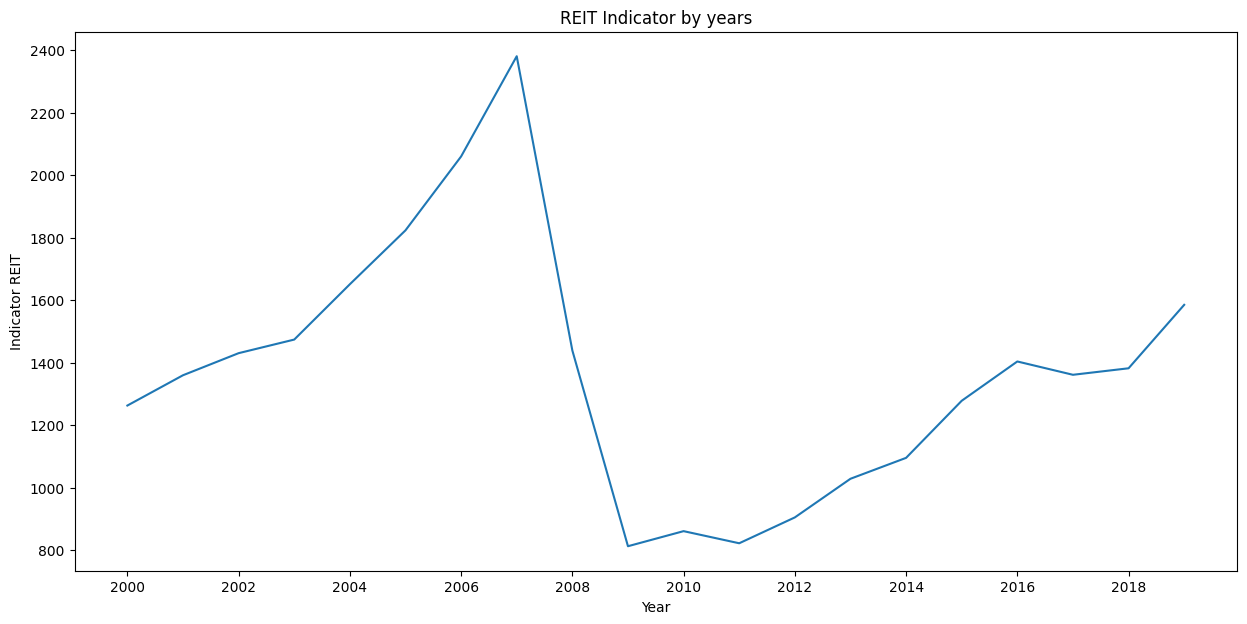

In [ ]:
plt.title("REIT Indicator by years")
df.groupby("Year").mean(numeric_only= True)["REIT Index"].plot(kind= "line", figsize=(15,7))
plt.ylabel("Indicator REIT")
plt.xticks(ticks=list(range(2000,2020,2)))
plt.show()

### 4/ Micro factors

**Bathrooms**

In [ ]:
# Set up datasets
df1 = df.copy()
df1["Timestamp"] = "AF2011"
df1.loc[df["Year"] < 2011, "Timestamp"] = "BF2011"

In [ ]:
df1["Timestamp"].unique()

array(['AF2011', 'BF2011'], dtype=object)

In [ ]:
df2= df1.groupby(["Bathrooms", "Timestamp"]).mean(numeric_only=True)["Price"].reset_index()
df2 = df2.sort_values(by= "Timestamp", ascending= False)
df2.head()

,Bathrooms,Timestamp,Price
1,1,BF2011,426607.506410
3,2,BF2011,636715.276680
5,3,BF2011,778816.666667
0,1,AF2011,482141.877601
2,2,AF2011,628519.473003


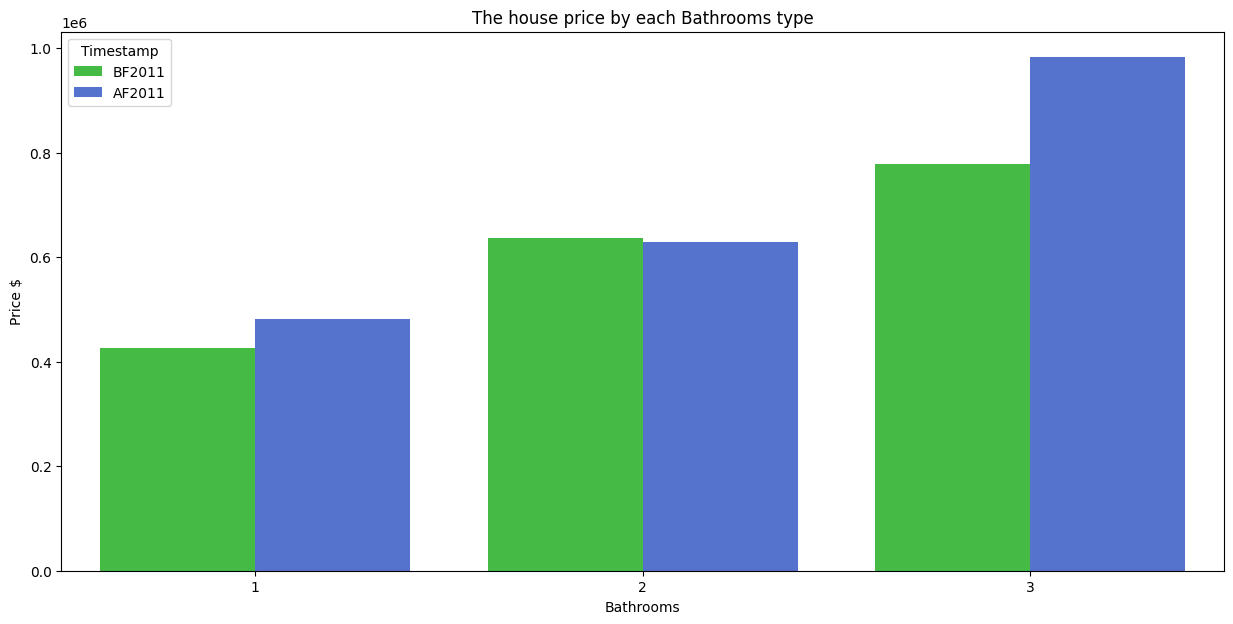

In [ ]:
# Bathrooms vs house price after 2011

plt.figure(figsize=(15,7))
plt.title("The house price by each Bathrooms type")
sns.barplot(df2, x= "Bathrooms", y= "Price", hue= "Timestamp", palette=["limegreen", "royalblue"])
plt.ylabel("Price $")
plt.show()

# plt.savefig("Bathrooms vs house price.png")
# files.download("Bathrooms vs house price.png")

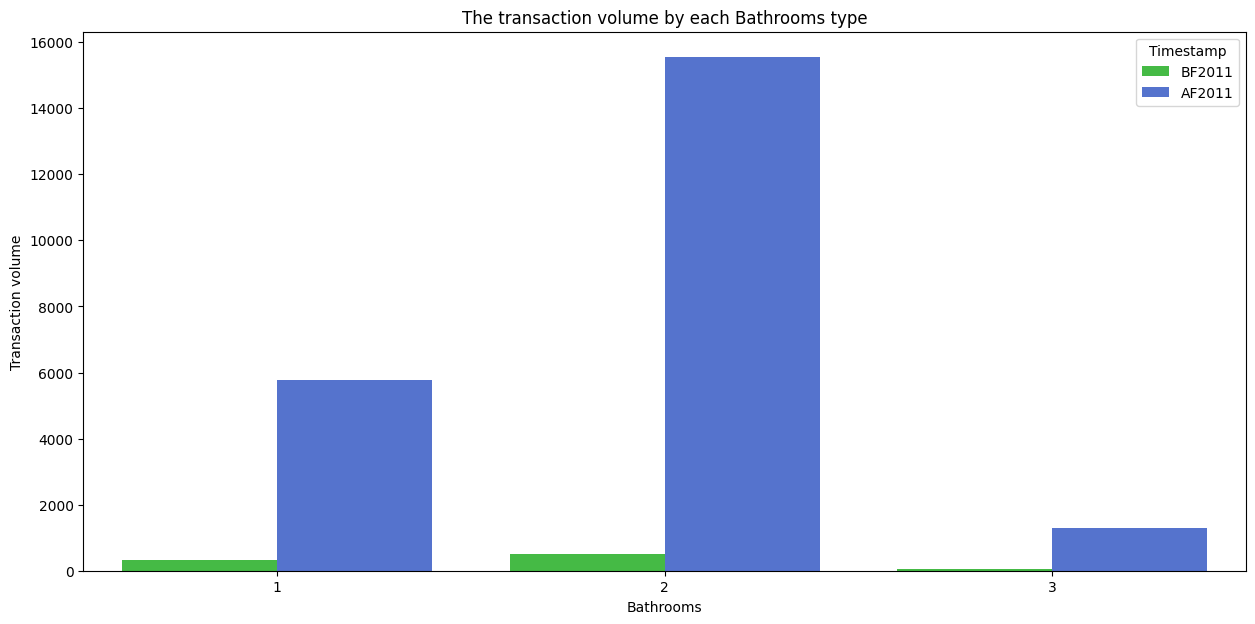

In [ ]:
# The transaction volume of Bathroom types
df2= (df1.groupby(["Bathrooms", "Timestamp"]).count()["Price"].reset_index(
                  ).sort_values(by= "Timestamp", ascending= False))
plt.figure(figsize=(15,7))
plt.title("The transaction volume by each Bathrooms type")
sns.barplot(df2, x= "Bathrooms", y= "Price", hue= "Timestamp", palette=["limegreen", "royalblue"])
plt.ylabel("Transaction volume")
plt.show()

# plt.savefig("The volume of Bathrooms type.png")
# files.download("The volume of Bathrooms type.png")

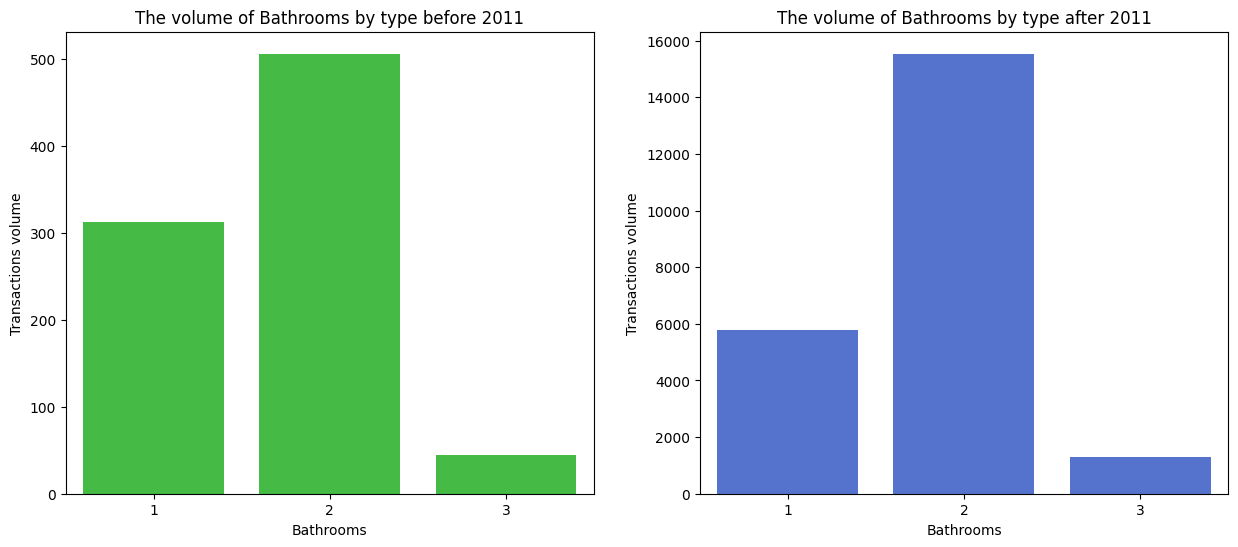

In [ ]:
# The transaction volume of Bathroom types

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title("The volume of Bathrooms by type before 2011")
sns.barplot(df2[df2["Timestamp"] == "BF2011"], x="Bathrooms", y="Price", color="limegreen")
plt.ylabel("Transactions volume")

plt.subplot(122)
plt.title("The volume of Bathrooms by type after 2011")
sns.barplot(df2[df2["Timestamp"] == "AF2011"], x="Bathrooms", y="Price", color="royalblue")
plt.ylabel("Transactions volume")
plt.show()

# plt.savefig("The transaction volume of Bathroom types.png")
# files.download("The transaction volume of Bathroom types.png")

🛏 **Bedrooms**



In [ ]:
# Set up datasets
df2= df1.groupby(["Bedrooms", "Timestamp"]).mean(numeric_only=True)["Price"].reset_index(
                  ).sort_values(by= "Timestamp", ascending= False)
df2.head()

,Bedrooms,Timestamp,Price
1,2,BF2011,416171.718310
3,3,BF2011,480196.330275
5,4,BF2011,638211.453634
7,5,BF2011,744052.424242
0,2,AF2011,526478.602871


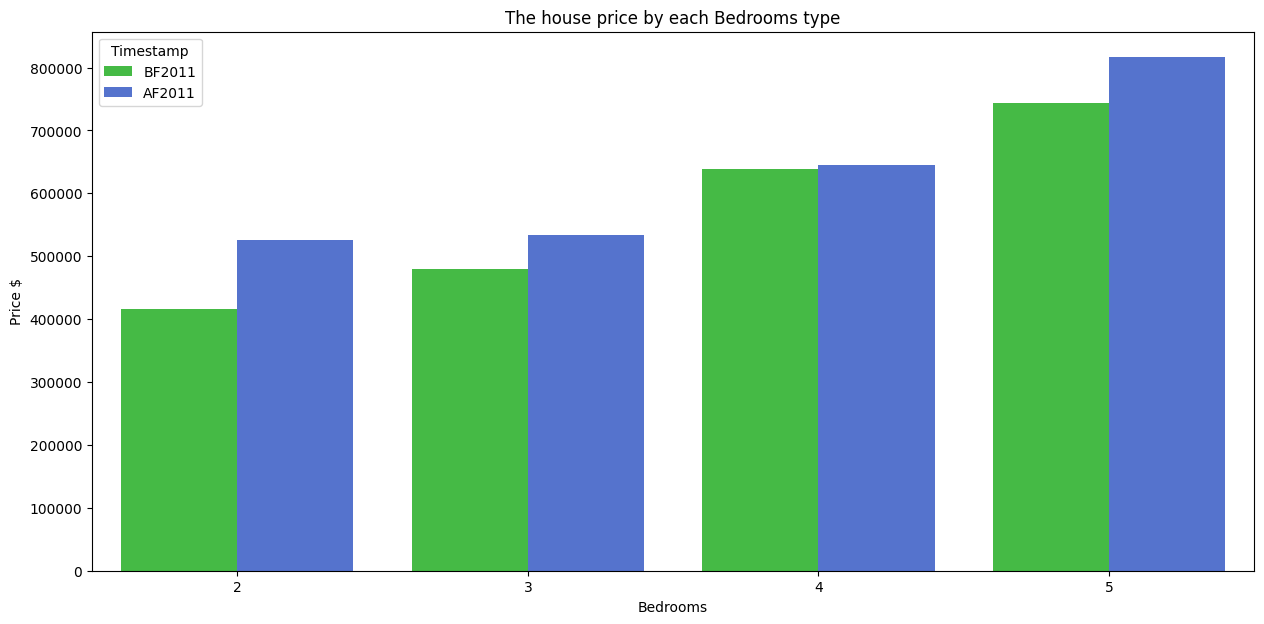

In [ ]:
# Bedrooms vs house price

plt.figure(figsize=(15,7))
plt.title("The house price by each Bedrooms type")
sns.barplot(df2, x= "Bedrooms", y= "Price", hue= "Timestamp", palette=["limegreen", "royalblue"])
plt.ylabel("Price $")
plt.show()

# plt.savefig("Bedrooms vs House price.png")
# files.download("Bedrooms vs House price.png")

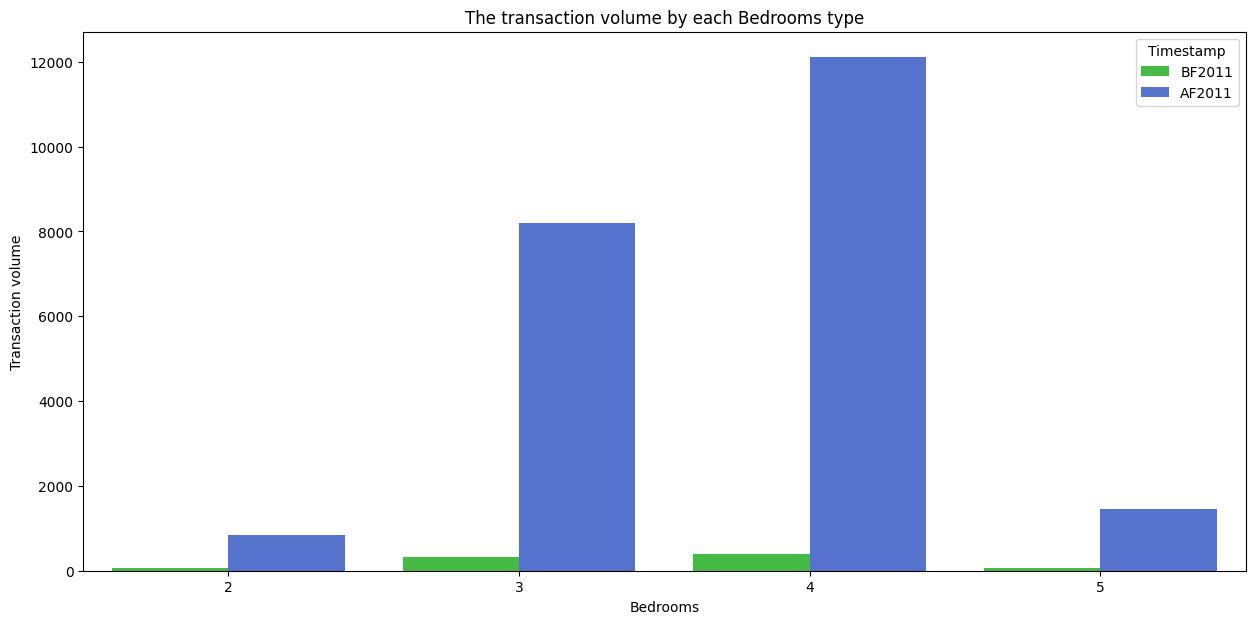

In [ ]:
# The transaction volume of Bedroom types
df2= (df1.groupby(["Bedrooms", "Timestamp"]).count()["Price"].reset_index()
      .sort_values(by= "Timestamp", ascending= False))
plt.figure(figsize=(15,7))
plt.title("The transaction volume by each Bedrooms type")
sns.barplot(df2, x= "Bedrooms", y= "Price", hue= "Timestamp", palette=["limegreen", "royalblue"])
plt.ylabel("Transaction volume")
plt.show()

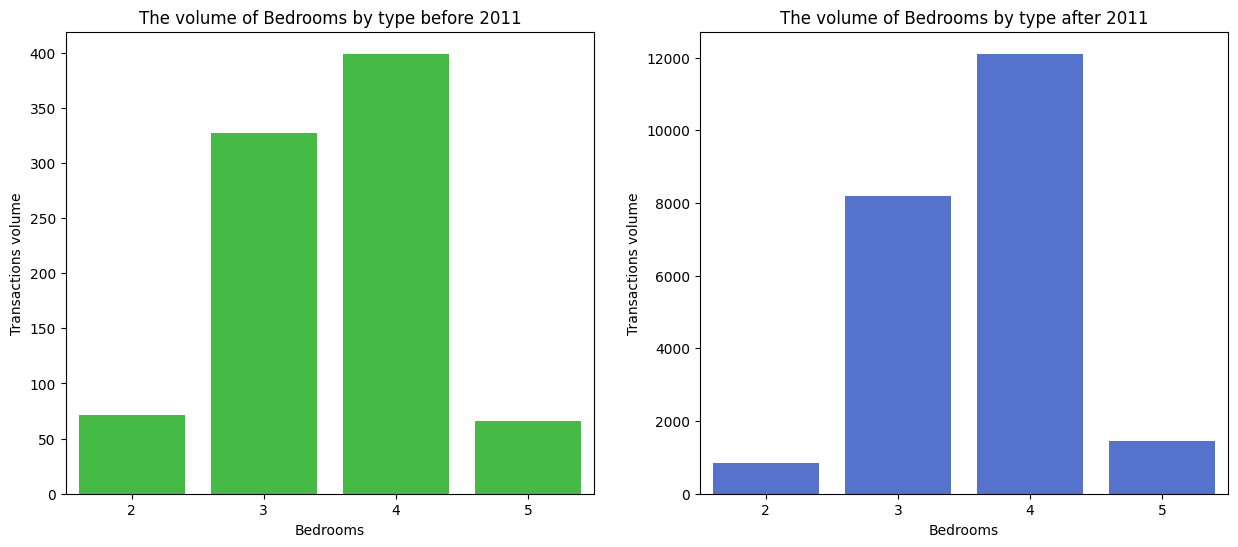

In [ ]:
# The transaction volume of Bathroom types

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title("The volume of Bedrooms by type before 2011")
sns.barplot(df2[df2["Timestamp"] == "BF2011"], x="Bedrooms", y="Price", color="limegreen")
plt.ylabel("Transactions volume")

plt.subplot(122)
plt.title("The volume of Bedrooms by type after 2011")
sns.barplot(df2[df2["Timestamp"] == "AF2011"], x="Bedrooms", y="Price", color="royalblue")
plt.ylabel("Transactions volume")
plt.show()

# plt.savefig("The transaction volume of Bedroom types.png")
# files.download("The transaction volume of Bedroom types.png")

🚓 **Garage**

In [ ]:
# Set up datasets
df2= (df1.groupby(["Garage", "Timestamp"]).mean(numeric_only=True)["Price"].reset_index()
      .sort_values(by= "Timestamp", ascending= False))
df2.head()

,Garage,Timestamp,Price
1,1.0,BF2011,443630.096070
3,2.0,BF2011,601937.209738
5,3.0,BF2011,647778.076923
7,4.0,BF2011,688708.333333
9,5.0,BF2011,691000.000000


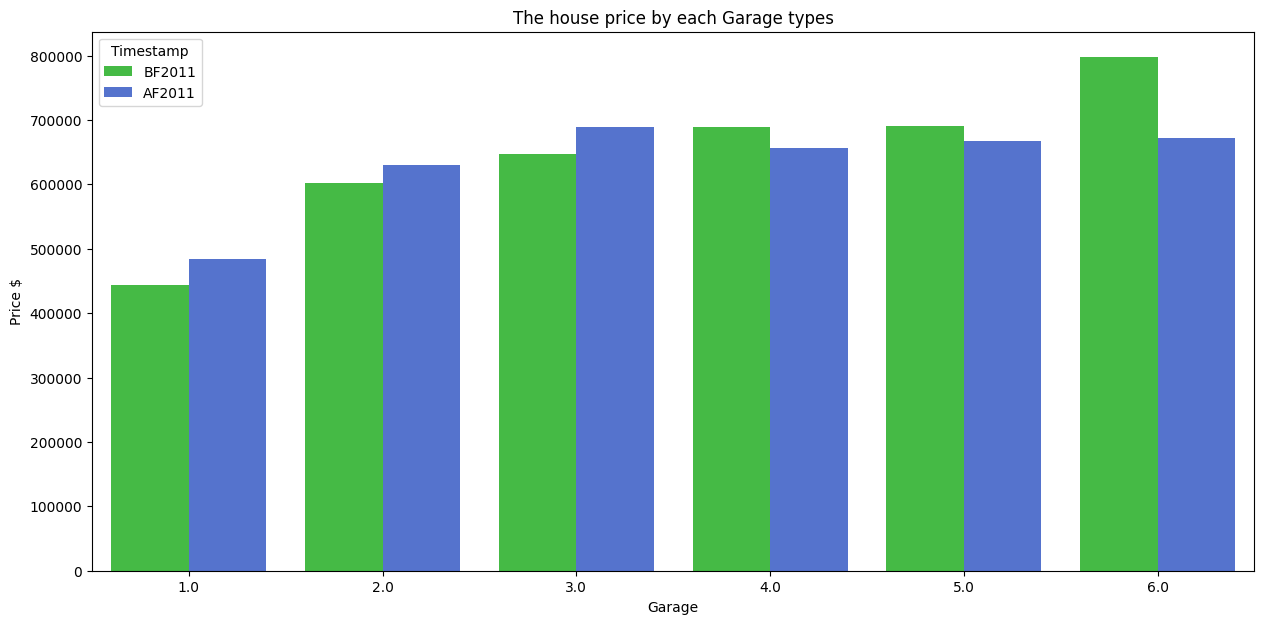

In [ ]:
# Garage vs house price
plt.figure(figsize=(15,7))
plt.title("The house price by each Garage types")
sns.barplot(df2, x= "Garage", y= "Price", hue= "Timestamp", palette=["limegreen", "royalblue"])
plt.ylabel("Price $")
plt.show()

# plt.savefig("Garage vs House price.png")
# files.download("Garage vs House price.png")

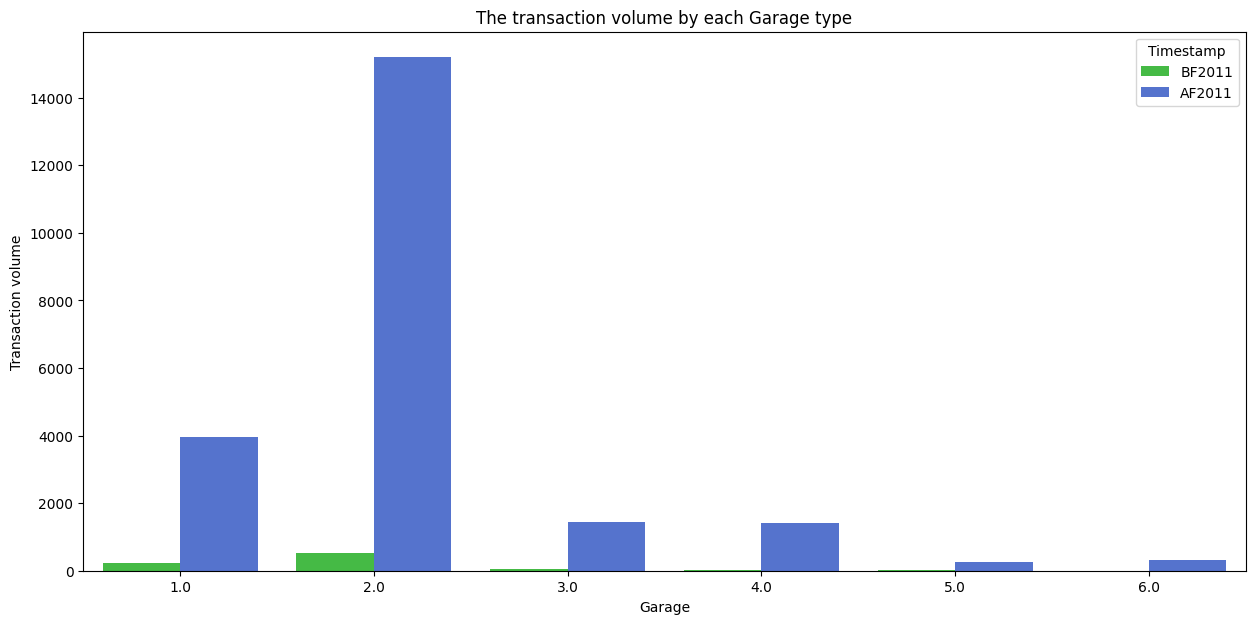

In [ ]:
# The transaction volume of Garage types
df2= (df1.groupby(["Garage", "Timestamp"]).count()["Price"].reset_index()
      .sort_values(by= "Timestamp", ascending= False))
plt.figure(figsize=(15,7))
plt.title("The transaction volume by each Garage type")
sns.barplot(df2, x= "Garage", y= "Price", hue= "Timestamp", palette=["limegreen", "royalblue"])
plt.ylabel("Transaction volume")
plt.show()

# plt.savefig("Garage vs House price_AF2011.png")
# files.download("Garage vs House price_AF2011.png")

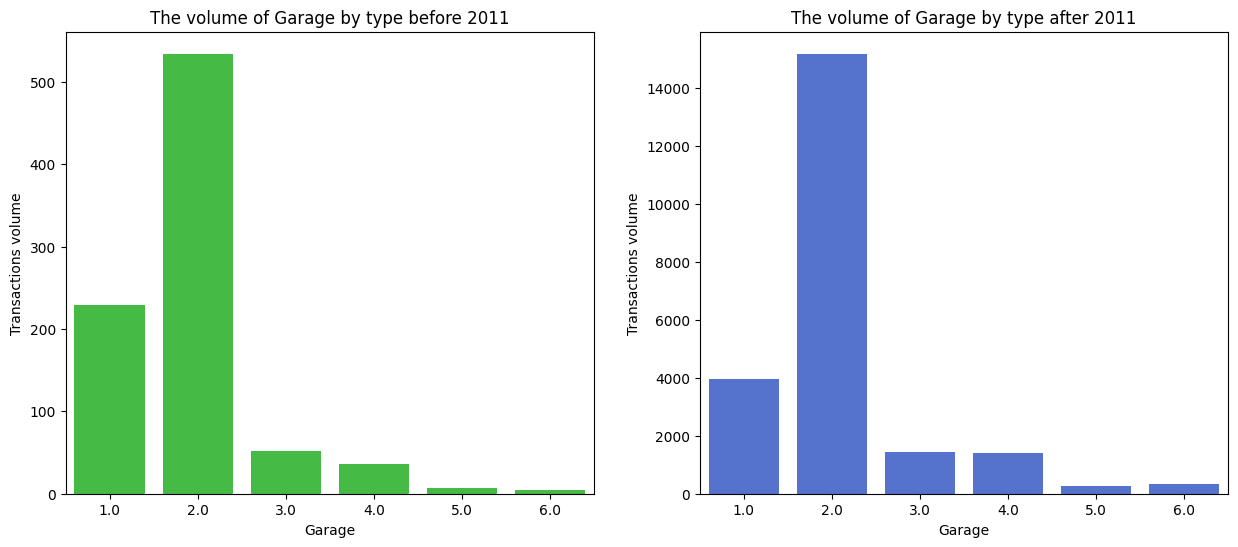

In [ ]:
# The transaction volume of Bathroom types

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title("The volume of Garage by type before 2011")
sns.barplot(df2[df2["Timestamp"] == "BF2011"], x="Garage", y="Price", color="limegreen")
plt.ylabel("Transactions volume")

plt.subplot(122)
plt.title("The volume of Garage by type after 2011")
sns.barplot(df2[df2["Timestamp"] == "AF2011"], x="Garage", y="Price", color="royalblue")
plt.ylabel("Transactions volume")
plt.show()

# plt.savefig("The transaction volume of Garage types.png")
# files.download("The transaction volume of Garage types.png")

**Floor area**

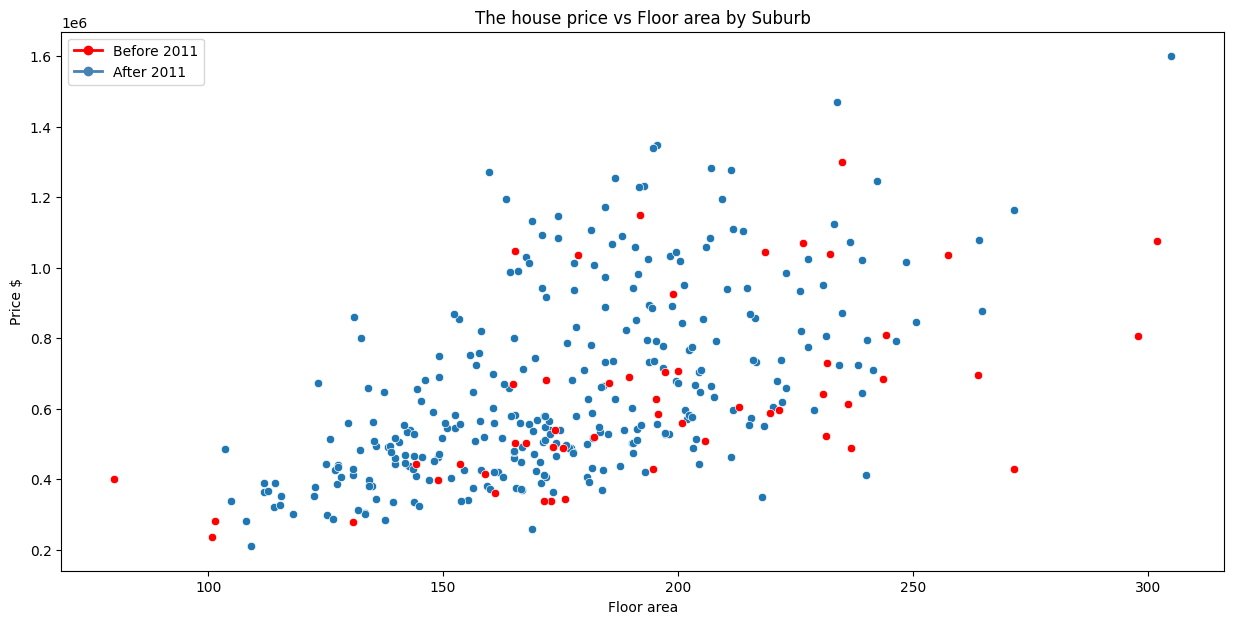

In [ ]:
df1 = df[df["Year"] >= 2011].groupby("Suburb").mean(numeric_only=True)
df2 = df[df["Year"] < 2011].groupby("Suburb").mean(numeric_only=True)

plt.figure(figsize =(15,7))

plt.title("The house price vs Floor area by Suburb")
sns.scatterplot(df1, x="Floor area", y="Price")
plt.ylabel("Price $")
sns.scatterplot(df2, x="Floor area", y="Price",color = 'r')

legend_elements = [
   plt.Line2D([100], [0.4*1e6], color='r', lw=2, label='Before 2011', marker='o'),
   plt.Line2D([100], [0.4*1e6], color='steelblue', lw=2, label='After 2011', marker='o')]
plt.legend(handles=legend_elements, loc='upper left')
plt.show()

# plt.savefig("price vs Floor.png")
# files.download("price vs Floor.png")

## 5/ Conclussion

House prices are impacted remarkably by the macro elements such as GDP per capita and REIT while the micro factors including bathrooms, bedrooms, and garages influence insignificantly the house prices.

*   **GDP percapita**: GDP per capita influences significantly house prices. Higher GDP per capita can lead to increased demand for housing, driving up prices due to the enhanced purchasing power of individuals
*   **REIT index**: Real Estate Investment Trust is like an indicator for the real estate market. A rising REIT index suggests a healthy real estate market and a potential increase in house prices.
*   **Bedrooms, Bathrooms & Garage**: These factors have a minor impact on price increases. Most people focus on house types such as 3 or 4 bedrooms, 2 bathrooms, and 2 garages.
*   **Floor area**: We found no irregularities in house prices with floor space over the years.


# III. Insight datasets

In [ ]:
# The Suburbs sell the most houses and the truth is that they come back and forth to the same places
df.groupby('Postcode').count().sort_values(by="Suburb", ascending = False)[:15]

,Suburb,Price,Bedrooms,Bathrooms,Garage,Land area,Floor area,Dist CBD,Station,Dist ST,Latitude,Longitude,School,Dist SC,Month,Year,CPI,GDP PC,REIT Index
Postcode,,,,,,,,,,,,,,,,,,,
6056,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495,1495
6065,1182,1182,1182,1182,1182,1182,1182,1182,1182,1182,1182,1182,1182,1182,1182,1182,1182,1182,1182
6164,998,998,998,998,998,998,998,998,998,998,998,998,998,998,998,998,998,998,998
6112,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948,948
6055,792,792,792,792,792,792,792,792,792,792,792,792,792,792,792,792,792,792,792
6167,707,707,707,707,707,707,707,707,707,707,707,707,707,707,707,707,707,707,707
6027,678,678,678,678,678,678,678,678,678,678,678,678,678,678,678,678,678,678,678
6107,662,662,662,662,662,662,662,662,662,662,662,662,662,662,662,662,662,662,662
6030,658,658,658,658,658,658,658,658,658,658,658,658,658,658,658,658,658,658,658


### 1/ Type of house
These are elements inside the house. As I mentioned earlier, the house focuses on a few specific types. We go to analyze further together about them.

In [ ]:
# Type of house have the highest sales quantity
a = df.groupby(["Bathrooms","Bedrooms", "Garage"]).count().reset_index().sort_values(by="Suburb",ascending = False)
a = a.loc[:,"Bathrooms":"Suburb"]

# Rename columns suburb into quantity of house types
a.rename(columns={"Suburb": "Quantity"}, inplace= True)

a.head()

,Bathrooms,Bedrooms,Garage,Quantity
37,2,4,2.0,8602
31,2,3,2.0,3112
6,1,3,1.0,2115
7,1,3,2.0,1667
39,2,4,4.0,721


In [ ]:
# Generate datasets based on type of house
df_type_house = df.groupby(["Bathrooms","Bedrooms", "Garage"]).mean(numeric_only=True).reset_index()
df_type_house

,Bathrooms,Bedrooms,Garage,Price,Land area,Floor area,Dist CBD,Dist ST,Postcode,Latitude,Longitude,Dist SC,Month,Year,CPI,GDP PC,REIT Index
0,1,2,1.0,4.809940e+05,1715.171247,98.158562,13.450767,2.897825,6077.619450,-31.964857,115.874059,1.350269,6.710359,2015.583510,1.911121,55847.872833,1330.624715
1,1,2,2.0,5.430504e+05,1388.092369,109.706827,13.601695,3.197574,6090.678715,-31.985293,115.887987,1.426398,6.911647,2015.469880,1.902008,55442.174538,1344.988554
2,1,2,3.0,5.430027e+05,907.243243,114.081081,13.291892,3.597730,6079.783784,-31.962284,115.904604,1.221034,6.513514,2016.459459,1.808649,55883.243784,1339.291892
3,1,2,4.0,5.752778e+05,742.888889,113.388889,10.638889,2.827000,6093.111111,-31.983923,115.889435,1.245507,7.333333,2016.333333,1.897778,56945.370000,1330.100000
4,1,2,5.0,3.675000e+05,1616.000000,79.000000,23.700000,9.850000,6064.500000,-31.906530,116.103520,1.886963,10.500000,2013.500000,2.290000,56264.225000,1063.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,3,5,2.0,9.909645e+05,1607.512987,263.042208,15.377273,3.601364,6081.857143,-31.941732,115.848888,1.464154,6.866883,2016.474026,1.830649,54911.618279,1366.425779
64,3,5,3.0,9.718269e+05,2046.480769,268.461538,19.086538,4.224000,6077.269231,-31.936528,115.866036,1.774122,6.461538,2016.673077,1.763077,55916.501731,1349.138462
65,3,5,4.0,9.456538e+05,3472.365385,262.519231,17.488462,3.796365,6067.980769,-31.925537,115.863154,1.511821,6.365385,2016.326923,1.885962,56781.648269,1362.161538
66,3,5,5.0,1.022596e+06,3088.538462,266.615385,17.392308,4.515385,6091.461538,-32.025374,115.890701,1.626973,6.461538,2016.307692,1.886154,56998.757692,1371.676923


In [ ]:
# Merge datasets
df_type_house = pd.merge(df_type_house, a, on = ["Bathrooms","Bedrooms", "Garage"],
                         how = "left")
df_type_house.drop(columns=["Postcode", "Latitude", "Longitude"], inplace=True)

In [ ]:
# Datasets particular type of house prices
df_type_house.sort_values(by="Quantity", ascending = False, inplace = True)
df_type_house = df_type_house.reset_index()
df_type_house.drop(columns="index", inplace= True)

df_type_house

,Bathrooms,Bedrooms,Garage,Price,Land area,Floor area,Dist CBD,Dist ST,Dist SC,Month,Year,CPI,GDP PC,REIT Index,Quantity
0,2,4,2.0,6.241488e+05,1265.489072,198.610323,20.462742,4.075537,1.626447,6.685306,2016.660428,1.809440,55479.690537,1376.166097,8602
1,2,3,2.0,5.946228e+05,909.200514,156.855077,16.767196,3.335124,1.488812,6.626607,2016.725900,1.810084,55495.197024,1380.953181,3112
2,1,3,1.0,4.336112e+05,930.538534,114.424113,17.725330,3.075826,1.295538,6.747518,2015.979196,1.860345,56137.826827,1330.310426,2115
3,1,3,2.0,4.974256e+05,1184.428314,121.662867,16.204910,3.412297,1.357760,6.640072,2015.893821,1.856455,55637.083749,1339.290522,1667
4,2,4,4.0,6.599836e+05,1834.327323,201.174757,18.979473,4.448761,1.642211,6.905687,2016.617198,1.813010,55728.516089,1370.201151,721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,3,2,2.0,1.310000e+06,240.000000,208.000000,3.292000,3.288000,1.087927,6.000000,2013.000000,2.450000,68198.420000,1029.800000,1
64,3,2,1.0,7.530000e+05,200.000000,99.000000,15.700000,2.100000,0.714363,9.000000,2016.000000,1.280000,49918.790000,1427.400000,1
65,1,5,5.0,5.100000e+05,8491.000000,203.000000,30.900000,4.400000,0.555867,4.000000,2016.000000,1.280000,49918.790000,1400.200000,1
66,1,5,6.0,6.250000e+05,244.000000,200.000000,5.800000,0.968000,0.704857,1.000000,2019.000000,1.610000,55049.570000,1460.100000,1


In [ ]:
# We have top 3 type house which constitutes the most proportion of remaining types such as type 1, type2, and type3
(df_type_house["Quantity"][:3].sum()) / df.shape[0]

0.5895719645293315

### 2/ House Type 1
House type 1 || 2 Bathrooms, 4 Bedrooms, and 2 Garages

In [ ]:
df1 = df[(df["Bathrooms"] == 2) & (df["Bedrooms"] == 4) & (df["Garage"] == 2)]


In [ ]:
# The percentages of house type 1 compared to other types
df1.shape[0] / df.shape[0]

0.3667291950886767

In [ ]:
# Transaction volume in Postcode order
df1["Postcode"].value_counts()[:20]

Postcode
6065    768
6164    562
6056    414
6030    388
6112    385
6055    347
6028    322
6107    261
6027    252
6167    250
6163    222
6031    201
6152    174
6018    165
6110    162
6020    150
6069    142
6063    139
6150    131
6169    125
Name: count, dtype: int64

In [ ]:
df1.groupby("Year").count()["Suburb"]

Year
2000       5
2001       5
2002       9
2003      11
2004      13
2005      10
2006      22
2007      24
2008      31
2009      53
2010      64
2011      63
2012     145
2013     236
2014     469
2015     818
2016    1175
2017    1608
2018    1962
2019    1879
Name: Suburb, dtype: int64

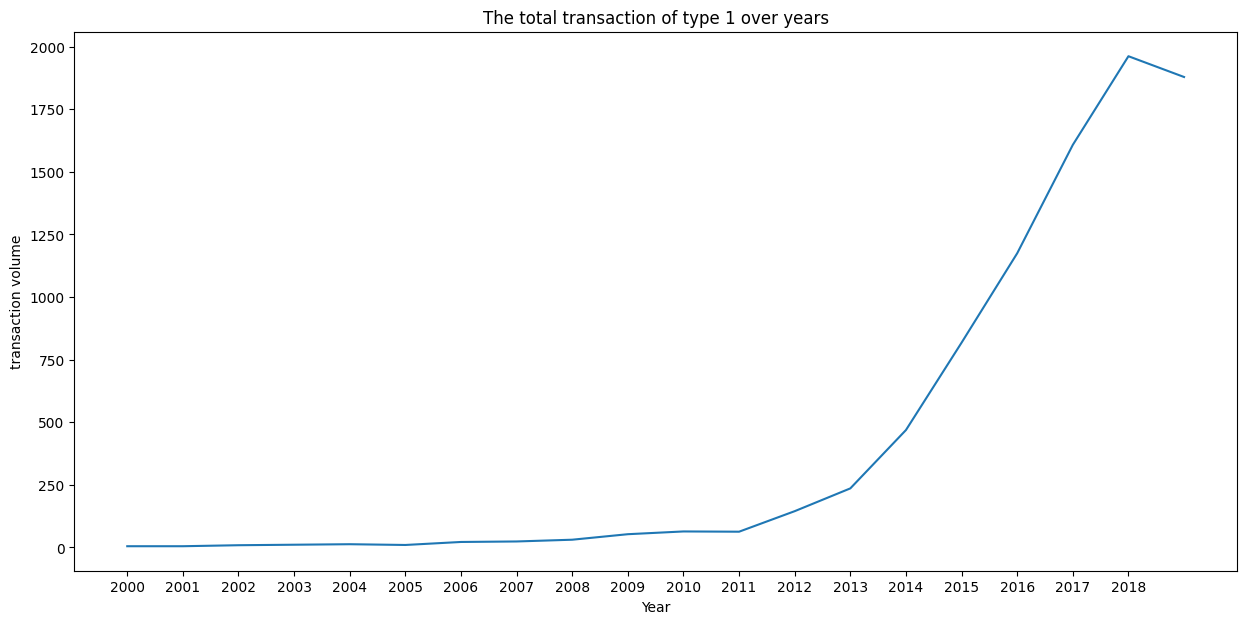

In [ ]:
plt.title("The total transaction of type 1 over years")
df1.groupby("Year").count()["Suburb"].plot(kind="line", figsize=(15,7))
plt.ylabel("transaction volume")
plt.xticks(ticks =list(range(2000,2019,1)))
plt.show()

### 3/ House Type 2
House type 2 || 2 Bathrooms, 3 Bedrooms, and 2 Garages

In [ ]:
df2 = df[(df["Bathrooms"] == 2) & (df["Bedrooms"] == 3) & (df["Garage"] == 2)]

In [ ]:
# The percentages of house type 2 compared to other types
df2.shape[0] / df.shape[0]

0.13267394270122784

In [ ]:
# Transaction volume in Postcode order
df2["Postcode"].value_counts()[:20]

Postcode
6065    194
6055    137
6056    125
6112    124
6018    117
6164    117
6107    113
6030     99
6153     79
6167     77
6111     69
6020     68
6152     64
6104     61
6036     57
6010     56
6163     56
6054     53
6031     49
6154     48
Name: count, dtype: int64

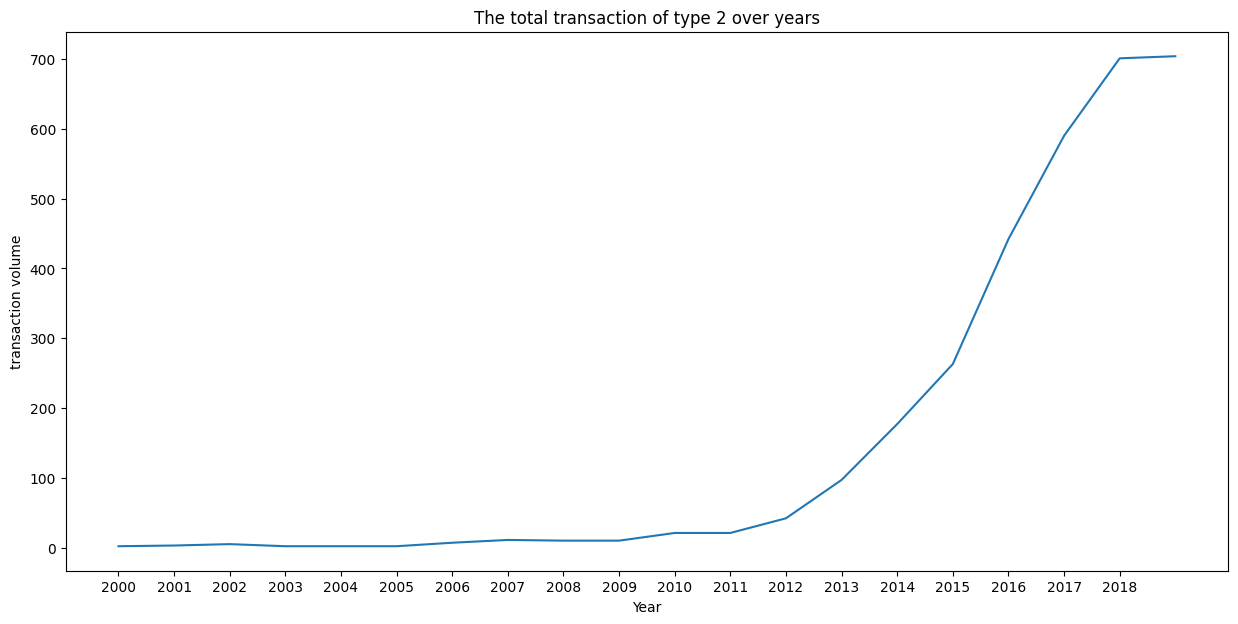

In [ ]:
plt.title("The total transaction of type 2 over years")
df2.groupby("Year").count()["Suburb"].plot(kind="line", figsize=(15,7))
plt.ylabel("transaction volume")
plt.xticks(ticks =list(range(2000,2019,1)))
plt.show()

### 4/ House Type 3
House type 3 || 1 Bathrooms, 3 Bedrooms, and 1 Garages

In [ ]:
df3 = df[(df["Bathrooms"] == 2) & (df["Bedrooms"] == 3) & (df["Garage"] == 2)]

In [ ]:
# The percentages of house type 3 compared to other types
df3.shape[0] / df.shape[0]

0.13267394270122784

In [ ]:
# Transaction volume in Postcode order
df3["Postcode"].value_counts()[:20]

Postcode
6065    194
6055    137
6056    125
6112    124
6018    117
6164    117
6107    113
6030     99
6153     79
6167     77
6111     69
6020     68
6152     64
6104     61
6036     57
6010     56
6163     56
6054     53
6031     49
6154     48
Name: count, dtype: int64

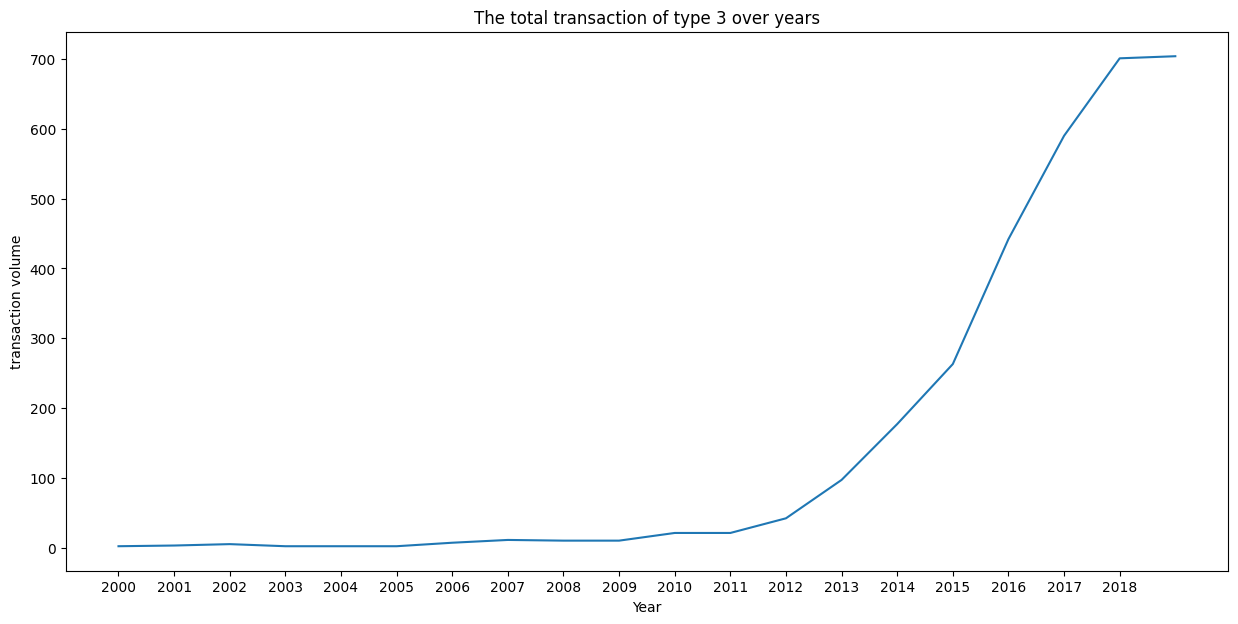

In [ ]:
plt.title("The total transaction of type 3 over years")
df3.groupby("Year").count()["Suburb"].plot(kind="line", figsize=(15,7))
plt.ylabel("transaction volume")
plt.xticks(ticks =list(range(2000,2019,1)))
plt.show()

### 5/ Conclussion


*   3 popular house types account for more than 60% of total transactions, namely the majority house type 1 about 37%, type 2 about 14%, and type 3 appropriately 9%.
*   Most house types saw a boom in volume transactions in 2011.

*   3 house types of the location have relatively similar allocations, mainly concentrated surrounding the center with a radius of about 15-20 km.

*   Places located directly in the center or far from the center have very few transactions.









# IV. Build location suggestion model

### 1/ Prepare datasets

In [ ]:
# Create dataframe
df1 = df.groupby("Suburb").mean(numeric_only = True)
df1 = df1[["Price", "Floor area","Bedrooms", "Bathrooms","Garage", "Dist CBD"]]

df1.head()

,Price,Floor area,Bedrooms,Bathrooms,Garage,Dist CBD
Suburb,,,,,,
Alexander Heights,4.479292e+05,166.584906,3.735849,1.820755,2.150943,14.012264
Alfred Cove,8.318647e+05,178.314815,3.527778,1.796296,2.092593,9.768102
Alkimos,4.063073e+05,180.692308,3.596154,1.980769,2.038462,39.563462
Anketell,1.600000e+06,305.000000,4.000000,2.000000,2.000000,30.600000
Applecross,1.090523e+06,188.181818,3.386364,2.045455,2.022727,7.181818


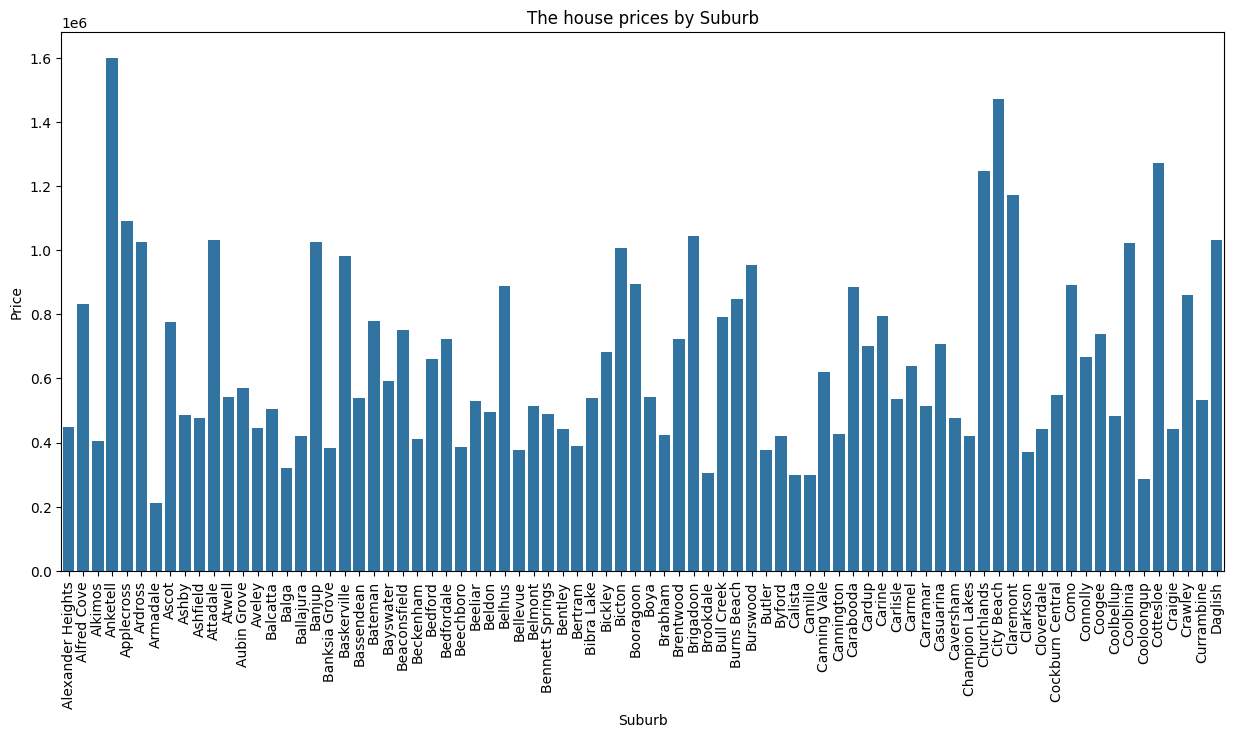

In [ ]:
df2 = df1.head(80).reset_index()

plt.figure(figsize=(15,7))
plt.title("The house prices by Suburb")
sns.barplot(df2, x="Suburb", y="Price")
plt.xticks(rotation='vertical')
plt.show()

# plt.savefig("The House prices by Suburbs.png", bbox_inches='tight')
# files.download("The House prices by Suburbs.png")

In [ ]:
df.iloc[0]

Suburb                         South Lake
Price                              565000
Bedrooms                                4
Bathrooms                               2
Garage                                2.0
Land area                             600
Floor area                            160
Dist CBD                             18.3
Station          Cockburn Central Station
Dist ST                               1.8
Postcode                             6164
Latitude                         -32.1159
Longitude                       115.84245
School        LAKELAND SENIOR HIGH SCHOOL
Dist SC                          0.828339
Month                                   9
Year                                 2018
CPI                                  1.91
GDP PC                           57273.52
REIT Index                         1427.4
Name: 0, dtype: object

### 2/ Build model

In [ ]:
# Input: 6 major factors, customers have to fill out the forms
print("*** Information customers ***")
print("--"*50)
a1 = input("Desired price house $: ")
a2 = input("Floor area m2: ")
a3 = input("Bedrooms: ")
a4 = input("Bathrooms: ")
a5 = input("Garage: ")
a6 = input("Distence Central business district km: ")
a = [a1, a2, a3, a4, a5, a6]
# a = [500000, 200, 3, 2, 2, 25]

# Add new rows in dataframe
df1.loc[len(df1)] = a

# Defination
dict_cost = {}

from numpy.linalg import norm
from numpy import dot
def cosine(a, b):
   return dot(a, b)/(norm(a)*norm(b))

# Normalize data
from sklearn.preprocessing import MinMaxScaler

X = df1.values
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Core values
for i in range(0, len(df1)-2):
  b = X_scaled[i].tolist()
  a = X_scaled[len(df1)-1].tolist()
  cost = cosine(a,b)
  dict_cost[df1.index[i]] = cost

# Convert dict to dataframe
df_cost = pd.DataFrame.from_dict(dict_cost, orient='index', columns= ['Cosine Value'])
df_cost.index.name = 'Suburb'

# Create list top 5 ideal places
df_cost.sort_values(by = "Cosine Value", ascending = False, inplace = True)
df_cost = df_cost.reset_index()[:10]
df1.reset_index(inplace = True)
df_cost = pd.merge(df_cost, df1, on= "Suburb", how="left")

# Output: 5 Suburbs which have the highest probability
print("---"*20)
df_cost

# a = [500000, 200, 4, 2, 2, 20] # Input orderly: information customers based on references

*** Information customers ***
----------------------------------------------------------------------------------------------------
Desired price house $: 500000
Floor area m2: 200
Bedrooms: 4
Bathrooms: 2
Garage: 2
Distence Central business district km: 20
------------------------------------------------------------


,Suburb,Cosine Value,Price,Floor area,Bedrooms,Bathrooms,Garage,Dist CBD
0,Hocking,0.998322,503654.411765,190.294118,3.941176,1.970588,2.132353,20.668382
1,Success,0.997603,530035.294118,197.352941,3.917647,2.023529,2.176471,21.383529
2,Jane Brook,0.997257,501554.80791,190.418079,3.943503,1.983051,2.20339,20.763277
3,Landsdale,0.996278,552159.351648,218.241758,4.010989,2.021978,2.032967,16.015385
4,Bibra Lake,0.996192,540365.669903,172.76699,3.815534,1.825243,1.932039,16.112621
5,Hammond Park,0.996183,528835.263158,197.210526,3.868421,2.0,2.118421,23.725
6,Atwell,0.995775,541041.597315,191.295302,3.798658,1.979866,2.100671,21.368456
7,Kingsley,0.995538,577826.923077,178.211538,3.903846,1.846154,1.923077,16.788462
8,Tapping,0.995484,488825.496689,203.238411,3.960265,2.02649,2.152318,26.577483
9,Beeliar,0.995464,528452.016129,185.096774,3.814516,1.983871,2.137097,20.598387


### 3/ Explain model

The provided Python function cosine calculates the cosine similarity between two vectors a and b:
1.   dot(a, b): This calculates the dot product of vectors a and b. The dot product measures the similarity between two vectors by multiplying their corresponding elements and summing the results.
2.   norm(a) and norm(b): These calculate the norms (magnitudes) of vectors a and b, respectively. The norm of a vector is the square root of the sum of the squares of its elements.
3.   Cosine = dot(a, b) / (norm(a) * norm(b)): The cosine similarity is calculated by dividing the dot product of the vectors by the product of their norms. This results in a value between -1 and 1, where:
	* 1 indicates perfect similarity (vectors are identical in direction)
	* 0 indicates no similarity (vectors are orthogonal)
	* -1 indicates perfect dissimilarity (vectors are opposite in direction)
  
This function effectively computes the cosine similarity between two vectors, which is a useful metric for measuring the similarity between documents.

Explaination model

In [ ]:
dict_cost

{'Alexander Heights': 0.8833959720442077,
 'Alfred Cove': 0.8863329500169179,
 'Alkimos': 0.9419139970509844,
 'Anketell': 0.860334943458429,
 'Applecross': 0.8844427211927847,
 'Ardross': 0.8779388175819227,
 'Armadale': 0.6489448972911823,
 'Ascot': 0.9044200836036415,
 'Ashby': 0.9297276942837873,
 'Ashfield': 0.8654047919230071,
 'Attadale': 0.8899915657858032,
 'Atwell': 0.9267963223966391,
 'Aubin Grove': 0.9289567513440683,
 'Aveley': 0.936031068336966,
 'Balcatta': 0.9215402460455931,
 'Balga': 0.8527899650255041,
 'Ballajura': 0.8585581166743038,
 'Banjup': 0.8859981359218715,
 'Banksia Grove': 0.9308012392198368,
 'Baskerville': 0.7086206903401328,
 'Bassendean': 0.9225922183844427,
 'Bateman': 0.8692272343215307,
 'Bayswater': 0.8656359739894364,
 'Beaconsfield': 0.925046676568561,
 'Beckenham': 0.8155139652668538,
 'Bedford': 0.8875408777009834,
 'Bedfordale': 0.9236813440172422,
 'Beechboro': 0.7303304099534333,
 'Beeliar': 0.9207985235193024,
 'Beldon': 0.7887282136999222

# V. Build model predictions house prices

Using 3 model prediction to validate house prices:

* Linear regression
* Ride regression
* Random forest regressor


In [ ]:
# Evaluate each Suburb
df2 = df.groupby("Suburb").mean(numeric_only=True)
df2.head()

,Price,Bedrooms,Bathrooms,Garage,Land area,Floor area,Dist CBD,Dist ST,Postcode,Latitude,Longitude,Dist SC,Month,Year,CPI,GDP PC,REIT Index
Suburb,,,,,,,,,,,,,,,,,
Alexander Heights,4.479292e+05,3.735849,1.820755,2.150943,628.679245,166.584906,14.012264,7.169811,6064.0,-31.826576,115.864926,1.923841,6.952830,2017.396226,1.710943,54047.963208,1433.529245
Alfred Cove,8.318647e+05,3.527778,1.796296,2.092593,629.101852,178.314815,9.768102,3.877185,6154.0,-32.033903,115.815922,1.476449,7.305556,2016.416667,1.672315,55109.966852,1358.500926
Alkimos,4.063073e+05,3.596154,1.980769,2.038462,399.076923,180.692308,39.563462,1.432885,6038.0,-31.625457,115.694659,3.282049,7.038462,2018.461538,1.771538,56247.081538,1486.007692
Anketell,1.600000e+06,4.000000,2.000000,2.000000,40945.000000,305.000000,30.600000,2.300000,6167.0,-32.227150,115.865620,3.927358,10.000000,2013.000000,2.450000,68198.420000,1045.500000
Applecross,1.090523e+06,3.386364,2.045455,2.022727,829.795455,188.181818,7.181818,1.831432,6153.0,-32.014007,115.837939,1.806727,7.090909,2018.068182,1.800909,55232.255227,1463.806818


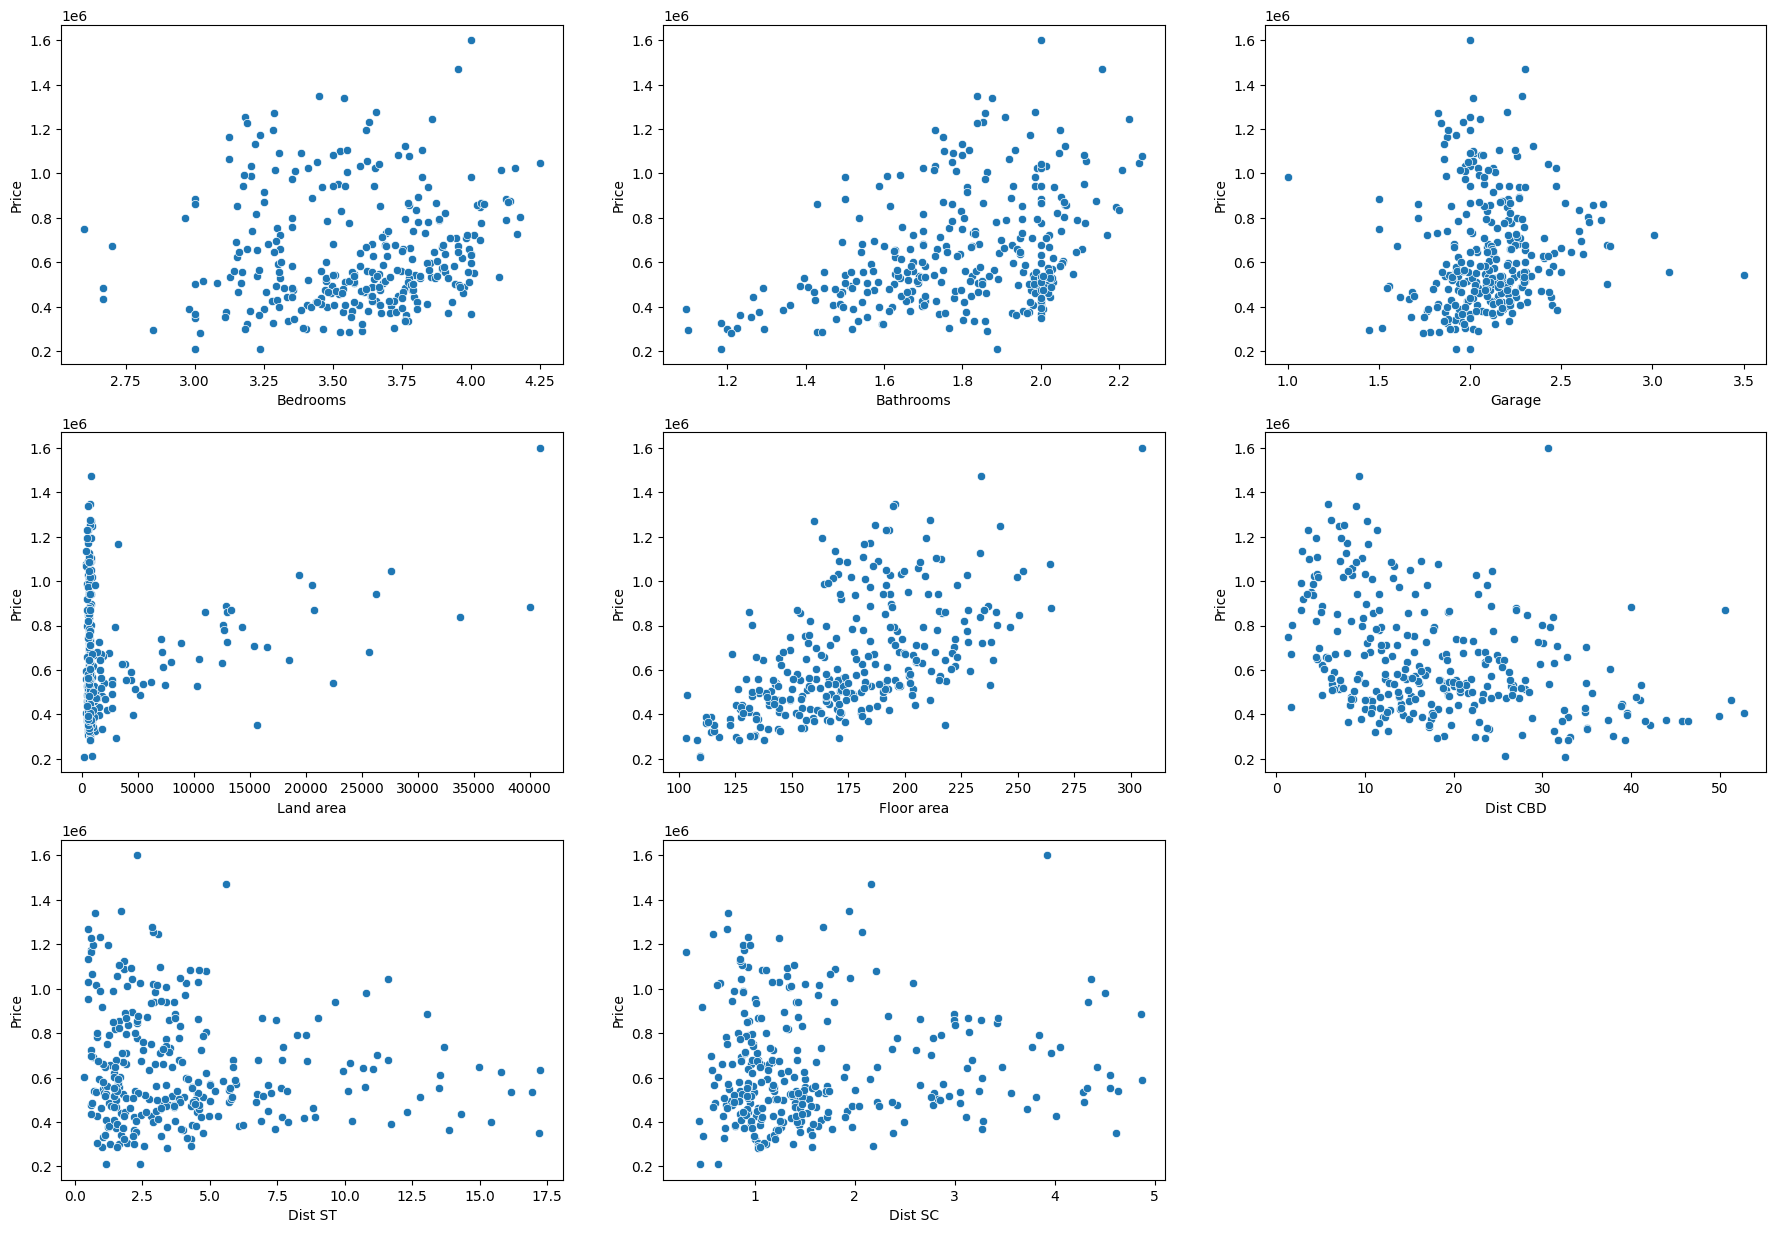

In [ ]:
# Correlation Price and other factors by Suburbs
k = ['Bedrooms', 'Bathrooms', 'Garage', 'Land area','Floor area',
     'Dist CBD', 'Dist ST','Dist SC']

plt.figure(figsize= (22,15))
for i in k:
  plt.subplot(331 + k.index(i))
  sns.scatterplot(df2, x= i, y="Price")

plt.show()

### 0/ Prepare datasets

In [ ]:
df.head()

,Suburb,Price,Bedrooms,Bathrooms,Garage,Land area,Floor area,Dist CBD,Station,Dist ST,Postcode,Latitude,Longitude,School,Dist SC,Month,Year,CPI,GDP PC,REIT Index
0,South Lake,565000,4,2,2.0,600,160,18.3,Cockburn Central Station,1.8,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,9,2018,1.91,57273.52,1427.4
2,Camillo,287000,3,1,1.0,719,86,22.6,Challis Station,1.9,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,6,2015,1.51,56758.87,1235.5
3,Bellevue,255000,2,1,2.0,651,59,17.9,Midland Station,3.6,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,7,2018,1.91,57273.52,1422.5
4,Lockridge,325000,4,1,2.0,466,131,11.2,Bassendean Station,2.0,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,11,2016,1.28,49918.79,1326.4
5,Mount Richon,409000,4,2,1.0,759,118,27.3,Armadale Station,1.0,6112,-32.153801,116.023658,ARMADALE SENIOR HIGH SCHOOL,1.227219,3,2013,2.45,68198.42,1013.4


In [ ]:
# Input data:
df2 = df[df["Year"] > 2010]
df2 = df2[["Suburb","Price", "Floor area","Bedrooms", "Bathrooms","Garage",
           "Dist CBD", "Postcode", "Land area", "Dist ST", "Dist SC"]]

# Tranform categorical into polynominal
from sklearn.preprocessing import LabelEncoder
ecd = LabelEncoder()
df2["Suburb_encode"] = ecd.fit_transform(df2["Suburb"])

### 1/ Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import r2_score

# Input data
X = df2.drop(columns=["Price", "Suburb"])
y = df2[["Price"]]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Build and train model
lg = LinearRegression()
lg.fit(X_train, y_train)

print(f"Coef: {lg.coef_}")
print(f"Intercept: {lg.intercept_}")

# Test model
y_pred = lg.predict(X_test) # There are results
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("--"*50)
print("R-squared:", r2_score(y_test, y_pred))
print("--"*50)
# Interpret model
X2 = sm.add_constant(X_test.values)
model_stats = sm.OLS(y_test.values.reshape(-1, 1), X2).fit()
model_stats.summary()

Coef: [[ 2.67368114e+03 -2.87417156e+04  4.97495417e+04  4.34838165e+03
  -1.19459088e+04 -3.35414697e+02  1.46304686e+01 -6.85369531e+03
  -8.88874520e+03  2.66383076e+02]]
Intercept: [2394563.74631548]
Mean Absolute Error: 147184.73848314874
Mean Squared Error: 39055411621.350685
Root Mean Squared Error: 197624.4206097786
----------------------------------------------------------------------------------------------------
R-squared: 0.5240245341397939
----------------------------------------------------------------------------------------------------


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     498.5
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:41:22   Log-Likelihood:                -61512.
No. Observations:                4519   AIC:                         1.230e+05
Df Residuals:                    4508   BIC:                         1.231e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.412e+06   3.44e+05      7.005      0.000    1.74e+06    3.09e+06
x1          2667.5769     66.063     40.379      0.000    2538.062    2797.092
x2         -2.697e+04   5814.655     -4.639      0.000   -3.84e+04   -1.56e+04
x3          4.981e+04   7463.304      6.674      0.000    3.52e+04    6.44e+04
x4          7629.0982   3384.200      2.254      0.024     994.406    1.43e+04
x5         -1.136e+04    320.532    -35.426      0.000    -1.2e+04   -1.07e+04
x6          -343.4730     56.605     -6.068      0.000    -454.447    -232.499
x7            14.1545      1.032     13.716      0.000      12.131      16.178
x8         -7056.0599   1067.193     -6.612      0.000   -9148.282   -4963.838
x9         -5223.6704   3538.047     -1.476      0.140   -1.22e+04    1712.637
x10          259.2878     34.288      7.562      0.000     192.066     326.509
==============================================================================
Omnibus:                      803.547   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1961.196
Skew:                           0.989   Prob(JB):                         0.00
Kurtosis:                       5.549   Cond. No.                     7.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
lg.coef_[0]

array([ 2.67368114e+03, -2.87417156e+04,  4.97495417e+04,  4.34838165e+03,
       -1.19459088e+04, -3.35414697e+02,  1.46304686e+01, -6.85369531e+03,
       -8.88874520e+03,  2.66383076e+02])

In [ ]:
X.columns

Index(['Floor area', 'Bedrooms', 'Bathrooms', 'Garage', 'Dist CBD', 'Postcode',
       'Land area', 'Dist ST', 'Dist SC', 'Suburb_encode'],
      dtype='object')

Text(0.5, 1.0, 'The weights of factors')

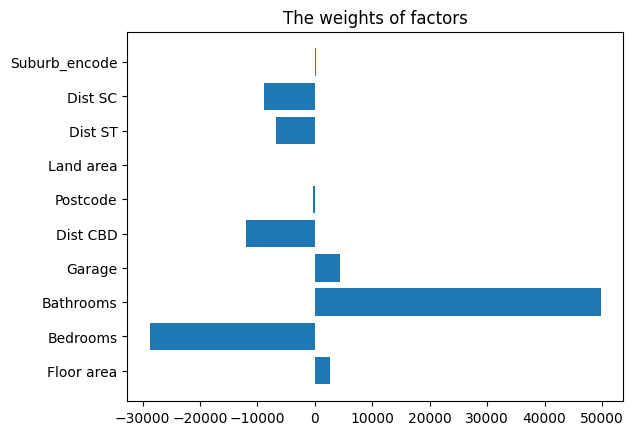

In [ ]:
plt.barh(X.columns, lg.coef_[0])
plt.title("The weights of factors")

# plt.savefig("The weights of factors.png", bbox_inches='tight')
# files.download("The weights of factors.png")

### 2/ Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

# Input data
X = df2.drop(columns = ["Price", "Suburb"])
y = df2[["Price"]]

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale datasets
scaler = MinMaxScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

# build and train model
ridge_model = Ridge(alpha= 20)
ridge_model.fit(X_scaled_train, y_train)

print(f"Coef: {ridge_model.coef_}")
print(f"Intercept: {ridge_model.intercept_}")
print("--"*50)
# test model
y_pred = ridge_model.predict(X_scaled_test)
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("--"*50)
print("R-squared:", r2_score(y_test, y_pred))
print("--"*50)
# # interpret model
X2 = sm.add_constant(X_scaled_test)
model_stats = sm.OLS(y_test.values.reshape(-1, 1), X2).fit()
model_stats.summary()


Coef: [[ 937517.13789986  -66311.18340749  110706.79130689   27440.17507288
  -603425.85317574  -59434.33038489  511754.48503872 -108357.07599445
   -36547.80760424   78872.98004235]]
Intercept: [380459.86160373]
----------------------------------------------------------------------------------------------------
Mean Absolute Error: 147496.06538113247
Mean Squared Error: 39129566792.47957
Root Mean Squared Error: 197811.9480528908
----------------------------------------------------------------------------------------------------
R-squared: 0.5231207914660201
----------------------------------------------------------------------------------------------------


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     498.5
Date:                Wed, 24 Apr 2024   Prob (F-statistic):               0.00
Time:                        13:41:23   Log-Likelihood:                -61512.
No. Observations:                4519   AIC:                         1.230e+05
Df Residuals:                    4508   BIC:                         1.231e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.488e+05   1.29e+04     27.002      0.000    3.23e+05    3.74e+05
x1          1.003e+06   2.48e+04     40.379      0.000    9.54e+05    1.05e+06
x2         -8.092e+04   1.74e+04     -4.639      0.000   -1.15e+05   -4.67e+04
x3          9.962e+04   1.49e+04      6.674      0.000    7.04e+04    1.29e+05
x4          3.815e+04   1.69e+04      2.254      0.024    4972.032    7.13e+04
x5         -5.918e+05   1.67e+04    -35.426      0.000   -6.25e+05   -5.59e+05
x6         -5.942e+04   9792.711     -6.068      0.000   -7.86e+04   -4.02e+04
x7          6.048e+05   4.41e+04     13.716      0.000    5.18e+05    6.91e+05
x8         -1.217e+05   1.84e+04     -6.612      0.000   -1.58e+05   -8.56e+04
x9         -2.636e+04   1.79e+04     -1.476      0.140   -6.14e+04    8641.029
x10          7.83e+04   1.04e+04      7.562      0.000     5.8e+04    9.86e+04
==============================================================================
Omnibus:                      803.547   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1961.196
Skew:                           0.989   Prob(JB):                         0.00
Kurtosis:                       5.549   Cond. No.                         23.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
ridge_model.coef_

array([[ 937517.13789986,  -66311.18340749,  110706.79130689,
          27440.17507288, -603425.85317574,  -59434.33038489,
         511754.48503872, -108357.07599445,  -36547.80760424,
          78872.98004235]])

Text(0.5, 1.0, 'The weights of factors')

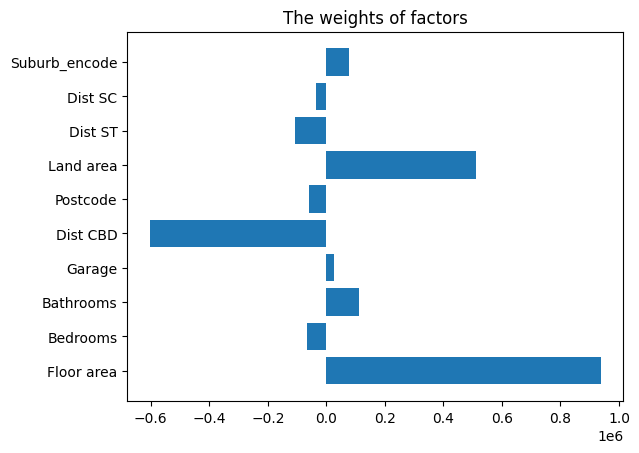

In [ ]:
plt.barh(X.columns, ridge_model.coef_[0])
plt.title("The weights of factors")

# plt.savefig("The weights of factors.png", bbox_inches= "tight")
# files.download("The weights of factors.png")

### 3/ Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

# Input data
X = df2.drop(columns = ["Price", "Suburb"])
y = df2[["Price"]]

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# build and train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# test model
y_pred = model.predict(X_test)
print("Interept model")
print("--"*50)
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("--"*50)
print("R-squared:", r2_score(y_test, y_pred))


Interept model
----------------------------------------------------------------------------------------------------
Mean Absolute Error: 75562.35062181899
Mean Squared Error: 12706321585.914341
Root Mean Squared Error: 112722.32070851958
----------------------------------------------------------------------------------------------------
R-squared: 0.8451457279503123


In [ ]:
# trend
model.feature_importances_

array([0.29383583, 0.00854175, 0.00786379, 0.00729479, 0.1637265 ,
       0.34632381, 0.07634388, 0.04778977, 0.02899372, 0.01928615])

Text(0.5, 1.0, 'The ratios of important features')

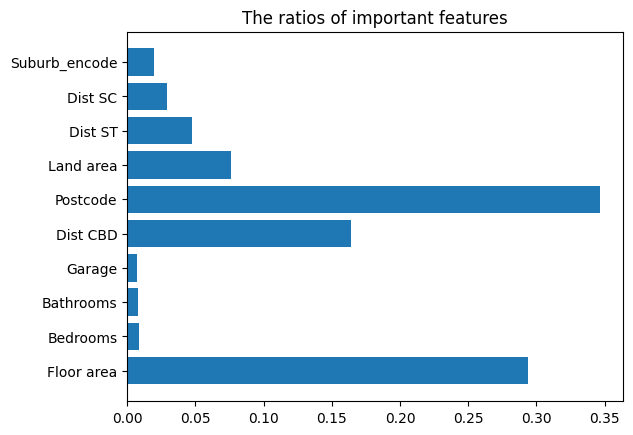

In [ ]:
# Factores impact the house prices
plt.barh(X_train.columns, model.feature_importances_)
plt.title("The ratios of important features")

# plt.savefig("The ratios of important features.png", bbox_inches="tight")
# files.download("The ratios of important features.png")

### 4/ Test model

In [ ]:
# Choose model Random Forest regressor because the model have the highest r2_score
# Input: 6 major factors, customers have to fill out the forms
print("*** Information customers ***")
print("--"*50)
a00 = input("Suburb Location: ")
a0 = df2.loc[df2["Suburb"] == a00, "Suburb_encode"].iloc[0]
print("Suburb Location_encode: ", a0)
a1 = input("Price house $: ")
a2 = input("Floor area m2: ")
a3 = input("Bedrooms: ")
a4 = input("Bathrooms: ")
a5 = input("Garage: ")
a6 = input("Distence Central business district km: ")
a7 = df2.loc[df2["Suburb"] == a00, "Postcode"].iloc[0]
print("Postcode: ", a7)
a8 = input("Land area: ")
a9 = input("Distance Station km: ")
a10 = input("Distence School km: ")
a1 = int(a1)
a = [[a2, a3, a4, a5, a6, a7, a8, a9, a10, a0]]

print("--"*50)


# The validation of house value
y_predict = model.predict(a)
MAE = metrics.mean_absolute_error(y_test, y_pred)
print("Evaluation house prices:", y_predict[0])
print("Price of customers input:", a1)

if a1 < (y_predict[0] - MAE):
  print("Conclussion: cheap house prices compared to the market ")
elif (y_predict[0] - MAE) <= a1 and a1 <=(y_predict[0] + MAE):
  print("Conclussion: House prices are affordable")
else:
  print("Conclussion: High house prices should be considered seriously")

# a = [South Lake, 570000, 160, 4, 2, 2, 18.3, 600, 1.8, 0.83] # Input orderly: information customers based on references

*** Information customers ***
----------------------------------------------------------------------------------------------------
Suburb Location: South Lake
Suburb Location_encode:  252
Price house $: 570000
Floor area m2: 160
Bedrooms: 4
Bathrooms: 2
Garage: 2
Distence Central business district km: 18.3
Postcode:  6164
Land area: 600
Distance Station km: 1.8
Distence School km: 0.83
----------------------------------------------------------------------------------------------------
Conclussion: House prices are affordable
Evaluation house prices: 541348.5
Price of customers input: 570000


# VI. Conclussion



*   House prices are impacted remarkably by the macro elements such as GDP per capita and REIT while the micro factors including bathrooms, bedrooms, and garages influence insignificantly the house prices.
*   The trading boom began in 2011 and grew significantly in the following years while house prices skyrocketed before 2011 and declined and remained stable in cost later on.

*   House-buying locations in Perth focus on surroundings in the center with a radius of about 15-20 km. Most geographical locations located directly in the center or far from the center have very few transactions.
*   The largest volume of transactions site in Perth's Northeast area, followed by the Northwest area in front of the sea and the Southern.
*   Three popular house types account for about 60% of total transactions, namely house types 1,2, and 3.
*   Thanks to models, customers choose appropriate locations and validate the value’s house with ease.
*   Overall, customers can travel to the Southern area where house prices are affordable prices combined with geographical locations not too far from the center and large floor areas.









# Final Presentation

It's finally the last step that you will put all the above things into one Presentation file to show up your hard works.
You can make a reference to the following ppt which we want to show you ideas on how a presentation of data analysis ideally should be.

In [113]:
from IPython import display

In [114]:
display.IFrame(src="https://drive.google.com/file/d/1QP7NeH3fQbwGRSsXONecmInI2E5reQGR/preview", width=990, height=599)

We hope this project series will be helpful for customers' upcoming journeys looking for their houses in Perth 😊